In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

# Refinement Strategies

1.

$\alpha$ = assumed contamination ratio

$\kappa= \alpha*e^{-epoch*b}$

per batch

$L = \kappa * Loss_{ > q_{(1-\alpha)}} + (1-\kappa) * Loss_{ < q_{(1-\alpha)}}$

# SCREW

### Single run Training curves

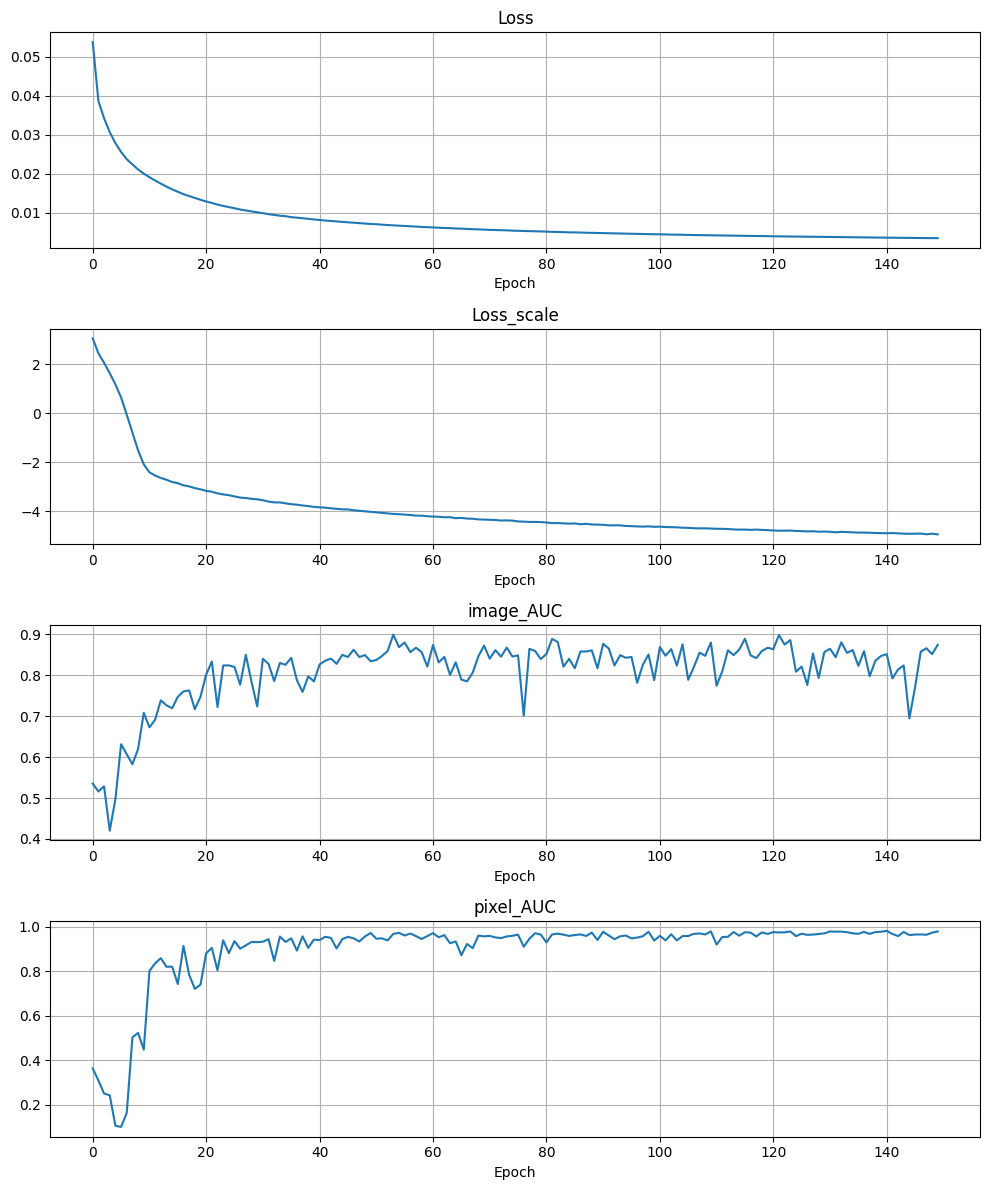

In [2]:
#/home/bule/projects/UTRAD/results/mvtec/contamination_0/DEV_FewData_17_05_24-3-screw/args.log
resdict=read_training_scores('/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log')

df=pd.DataFrame(resdict)
df['Loss_scale']=np.log(df['Loss_scale'])

fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column], linestyle='-')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('')
    axs[i].set_title(f'{column}')
    axs[i].grid(True)
    
    
    
    
plt.tight_layout()
plt.show()

## Multiple runs

In [3]:
def plot_multiple_training_scores(filepaths, title='Screw 10 Percent contam', log_scale=True):
    dataframes = []
    for filepath in filepaths:
        resdict = read_training_scores(filepath)
        df = pd.DataFrame(resdict)
        if log_scale:
            df['Loss_scale'] = np.log(df['Loss_scale'])
        dataframes.append(df)

    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    legend_labels = []
    for idx, df in enumerate(dataframes):
        for i, column in enumerate(df.columns):
            axs[i].plot(df.index, df[column], linestyle='-', label=f'Run {idx + 1}')
            legend_labels.append(f'Run {idx + 1}')

    for i, column in enumerate(dataframes[0].columns):
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel(column)
        axs[i].set_title(f'{column}')
        axs[i].grid(True)
        
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(dataframes), fontsize='small')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

## clean

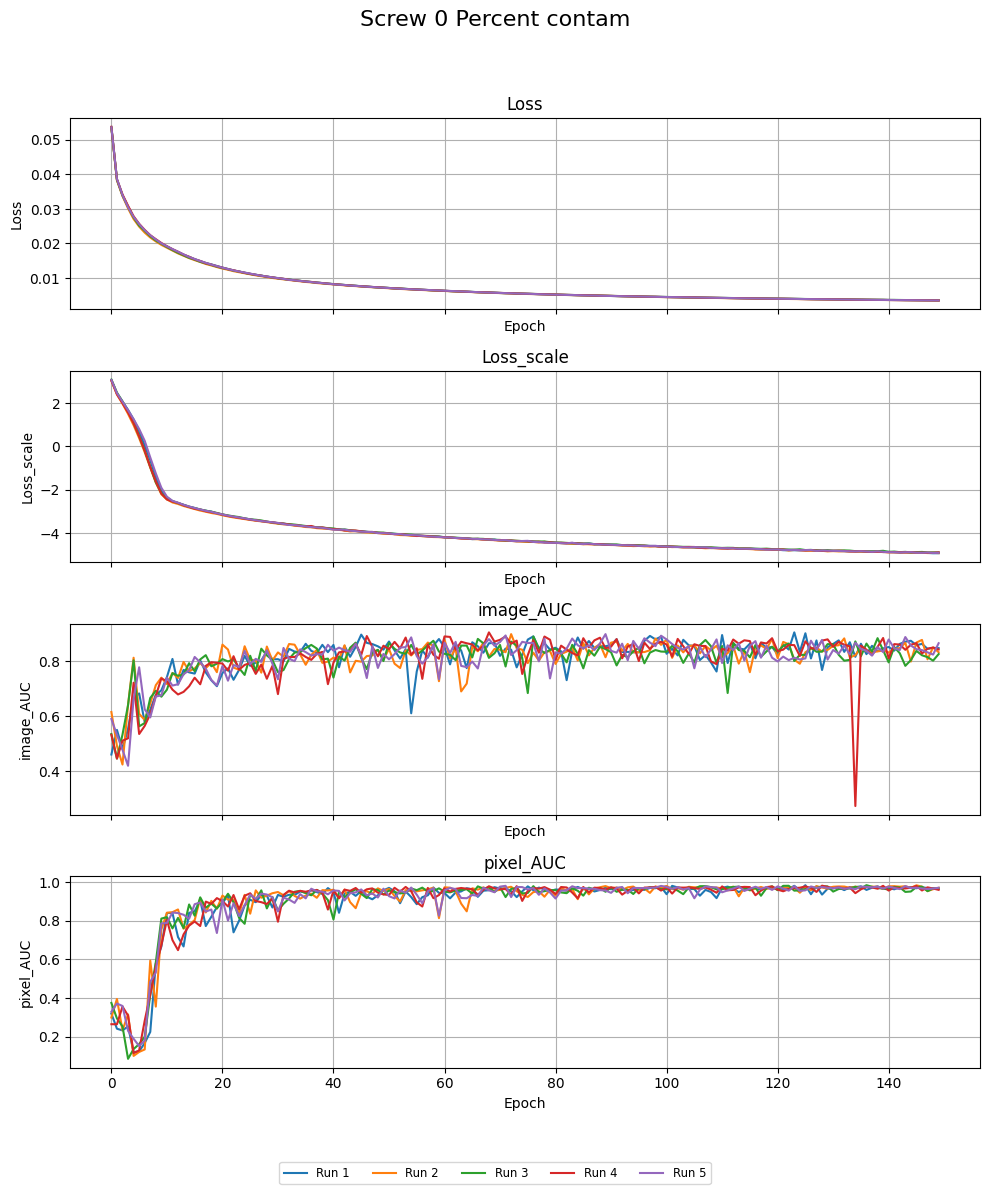

<Axes: >

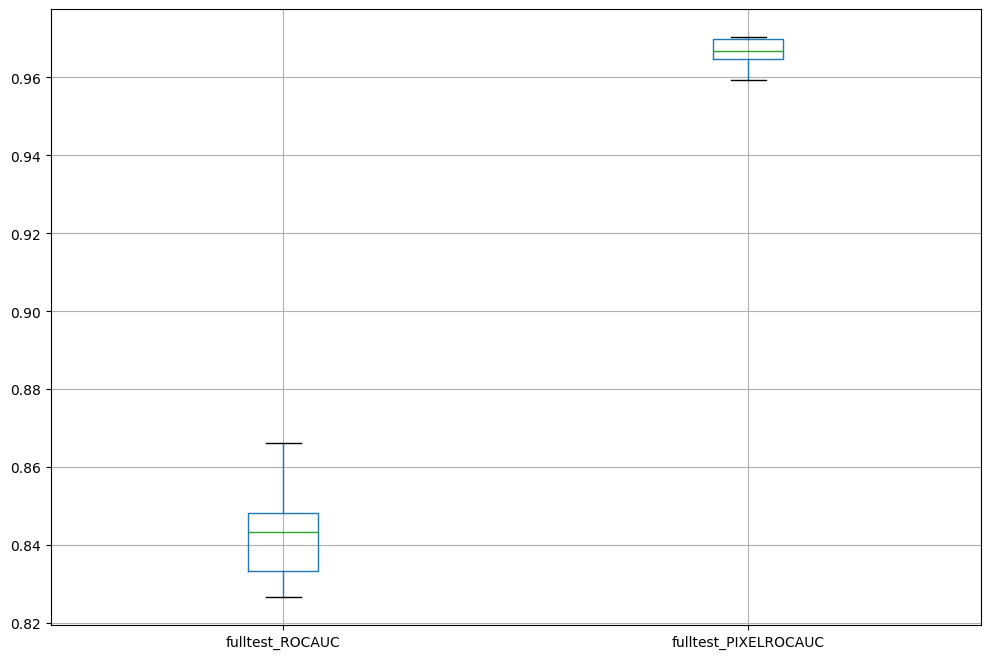

In [4]:
filepaths_clean_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw/args.log', 

]

plot_multiple_training_scores(filepaths_clean_100, title='Screw 0 Percent contam', log_scale=True)
lastrow0cont=last_rows_metric(filepaths_clean_100)
resdf={'fulltest_ROCAUC':lastrow0cont['image_AUC'],'fulltest_PIXELROCAUC':lastrow0cont['pixel_AUC'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()

#### Contaminated / clean on diffreretn testsets

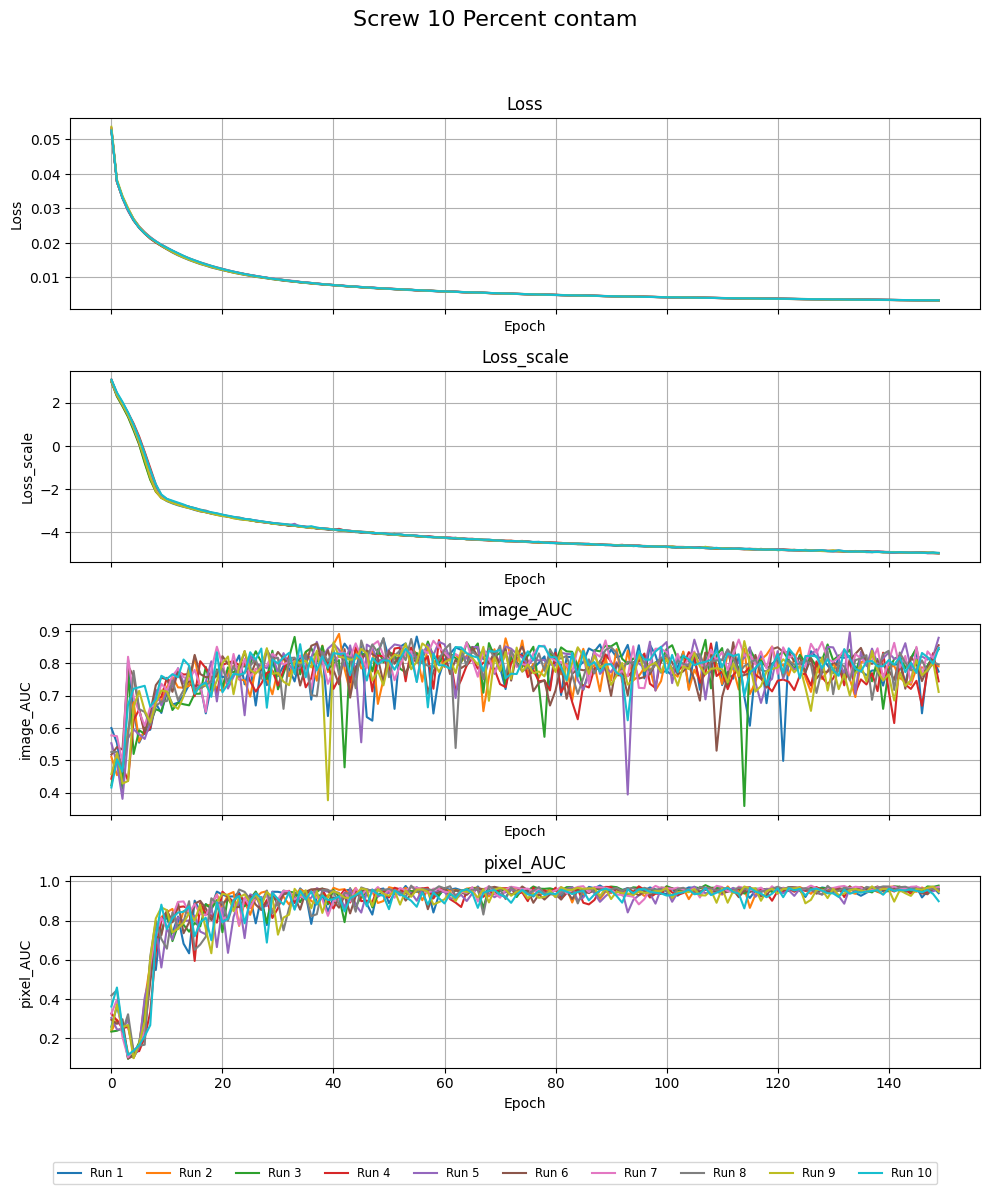

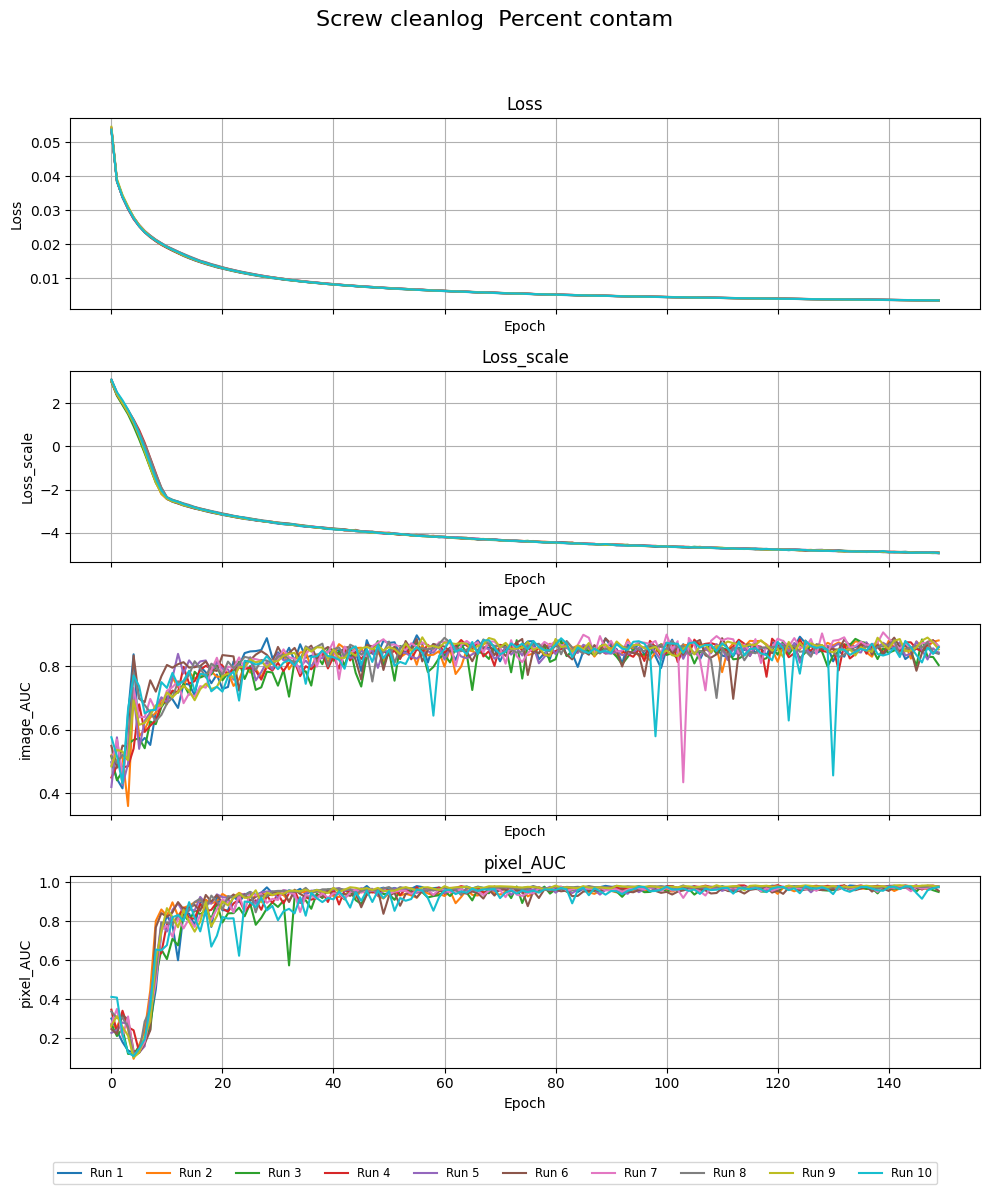

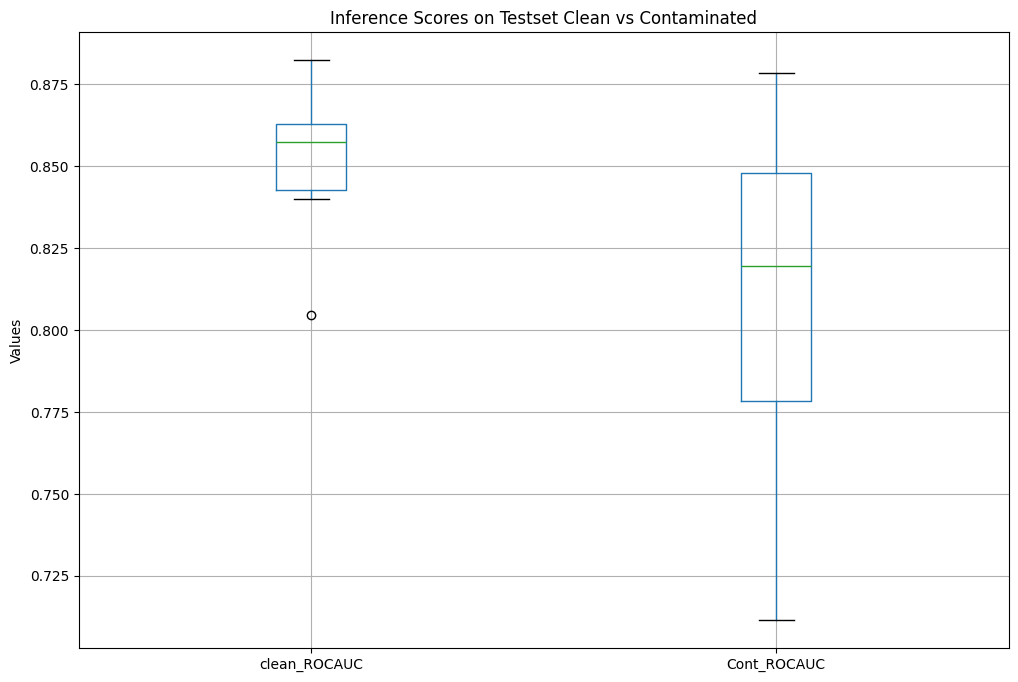

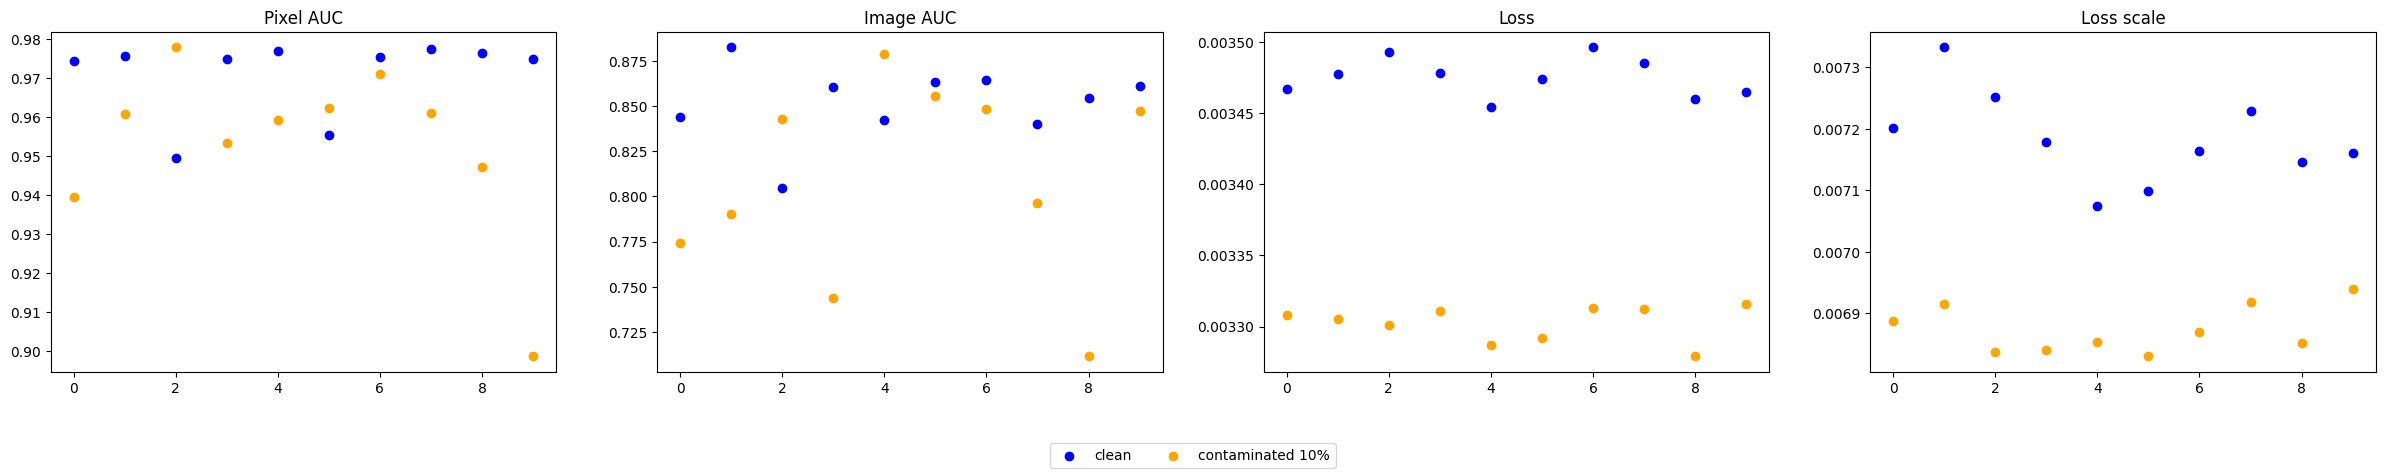

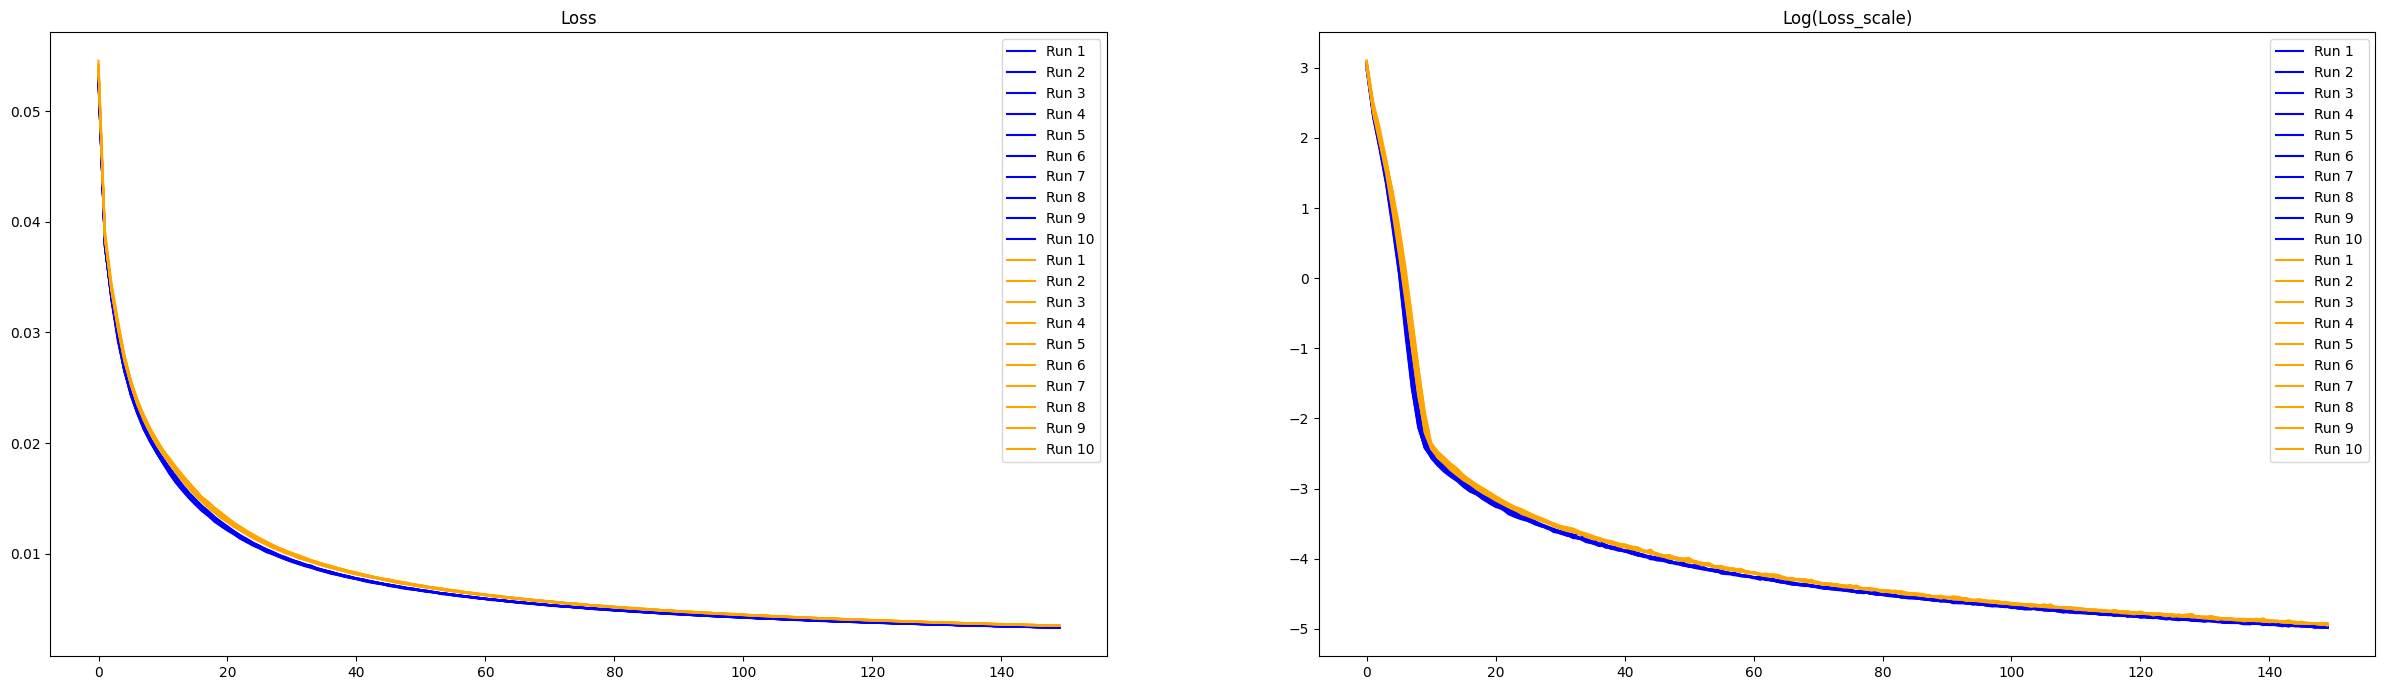

In [5]:
filepaths_cont_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args.log', 
]

plot_multiple_training_scores(filepaths_cont_100, title='Screw 10 Percent contam', log_scale=True)
lastrow_cont=last_rows_metric(filepaths_cont_100)

filepaths_cont_cleaned = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw/args_cleaned.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw/args_cleaned.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw/args_cleaned.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw/args_cleaned.log', 
]

plot_multiple_training_scores(filepaths_cont_cleaned, title='Screw cleanlog  Percent contam', log_scale=True)
lastrow_clean=last_rows_metric(filepaths_cont_cleaned)

resdf={'clean_ROCAUC':lastrow_clean['image_AUC'],'Cont_ROCAUC':lastrow_cont['image_AUC']}#,'clean_PIXELROCAUC':lastrow_clean['pixel_AUC'], 'Cont_PIXELROCAUC':lastrow_cont['Loss'] }
resdf=pd.DataFrame(resdf)
plt.figure(figsize=(12, 8))
resdf.boxplot()
plt.title('Inference Scores on Testset Clean vs Contaminated')
plt.ylabel('Values')
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(30, 5))

sc1 = axes[0].scatter(np.arange(10), lastrow_clean['pixel_AUC'], label='clean',color='blue')
sc2 = axes[0].scatter(np.arange(10), lastrow_cont['pixel_AUC'], label='contaminated 10%',color='orange')
axes[0].set_title('Pixel AUC')

sc3 = axes[1].scatter(np.arange(10), lastrow_clean['image_AUC'], label='clean',color='blue')
sc4 = axes[1].scatter(np.arange(10), lastrow_cont['image_AUC'], label='contaminated 10%',color='orange')
axes[1].set_title('Image AUC')

sc5 = axes[2].scatter(np.arange(10), lastrow_clean['Loss'], label='clean',color='blue')
sc6 = axes[2].scatter(np.arange(10), lastrow_cont['Loss'], label='contaminated 10%',color='orange')
axes[2].set_title('Loss')

sc7 = axes[3].scatter(np.arange(10), lastrow_clean['Loss_scale'], label='clean',color='blue')
sc8 = axes[3].scatter(np.arange(10), lastrow_cont['Loss_scale'], label='contaminated 10%',color='orange')
axes[3].set_title('Loss scale')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.subplots_adjust(bottom=0.2)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(30, 8))

# First subplot for Loss
for i, path in enumerate(filepaths_cont_100):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont_cleaned):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[0].plot(np.arange(len(df)), df['Loss'], label=f'Run {i + 1}', color='orange')

axes[0].set_title('Loss')
axes[0].legend(loc='upper right')

# Second subplot for log(Loss_scale)
for i, path in enumerate(filepaths_cont_100):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='blue')

for i, path in enumerate(filepaths_cont_cleaned):
    resdict = read_training_scores(path)
    df = pd.DataFrame(resdict)
    axes[1].plot(np.arange(len(df)), np.log(df['Loss_scale']), label=f'Run {i + 1}', color='orange')

axes[1].set_title('Log(Loss_scale)')
axes[1].legend(loc='upper right')

plt.subplots_adjust(bottom=0.1)
plt.show()

### same seed only modelseed change

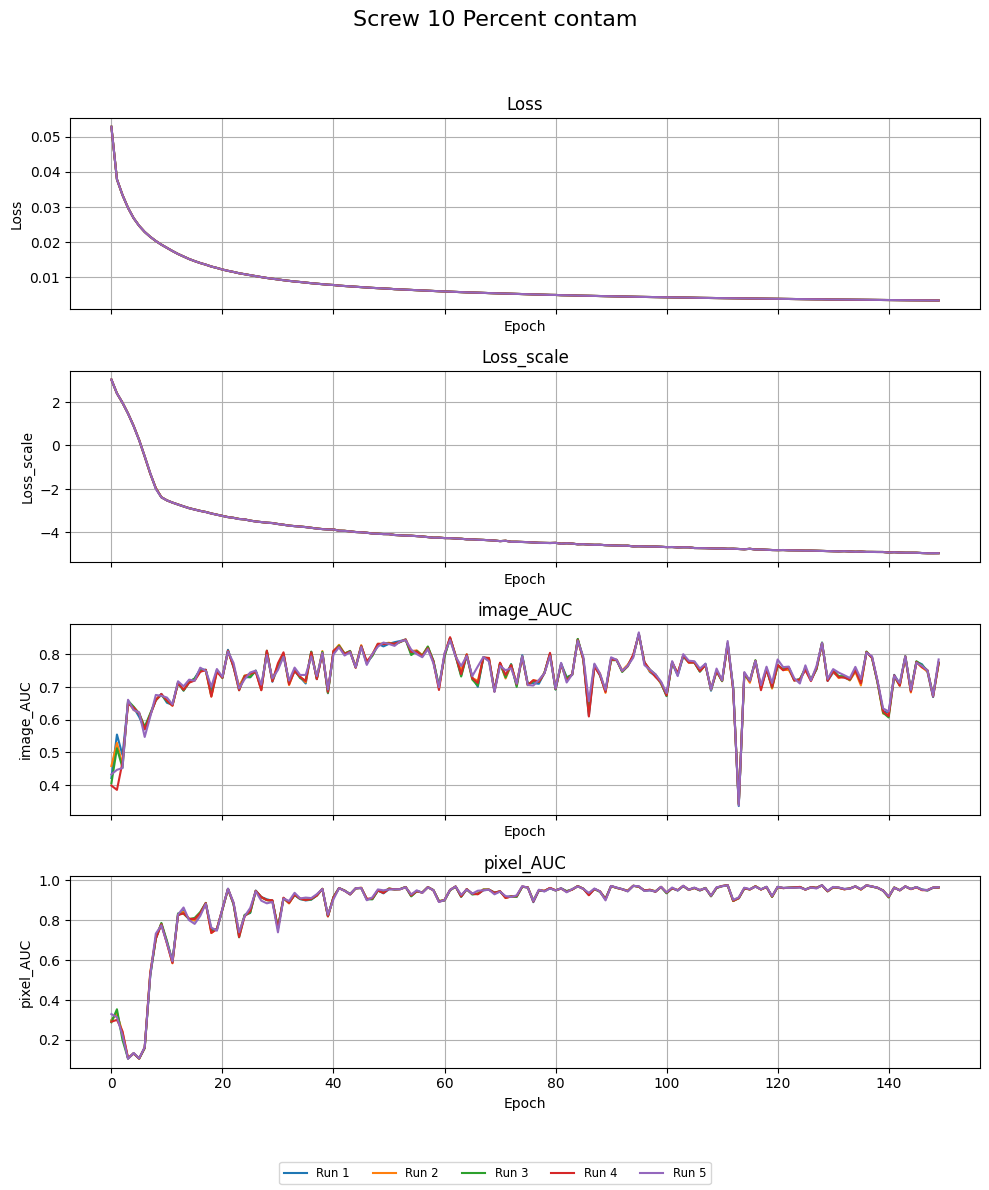

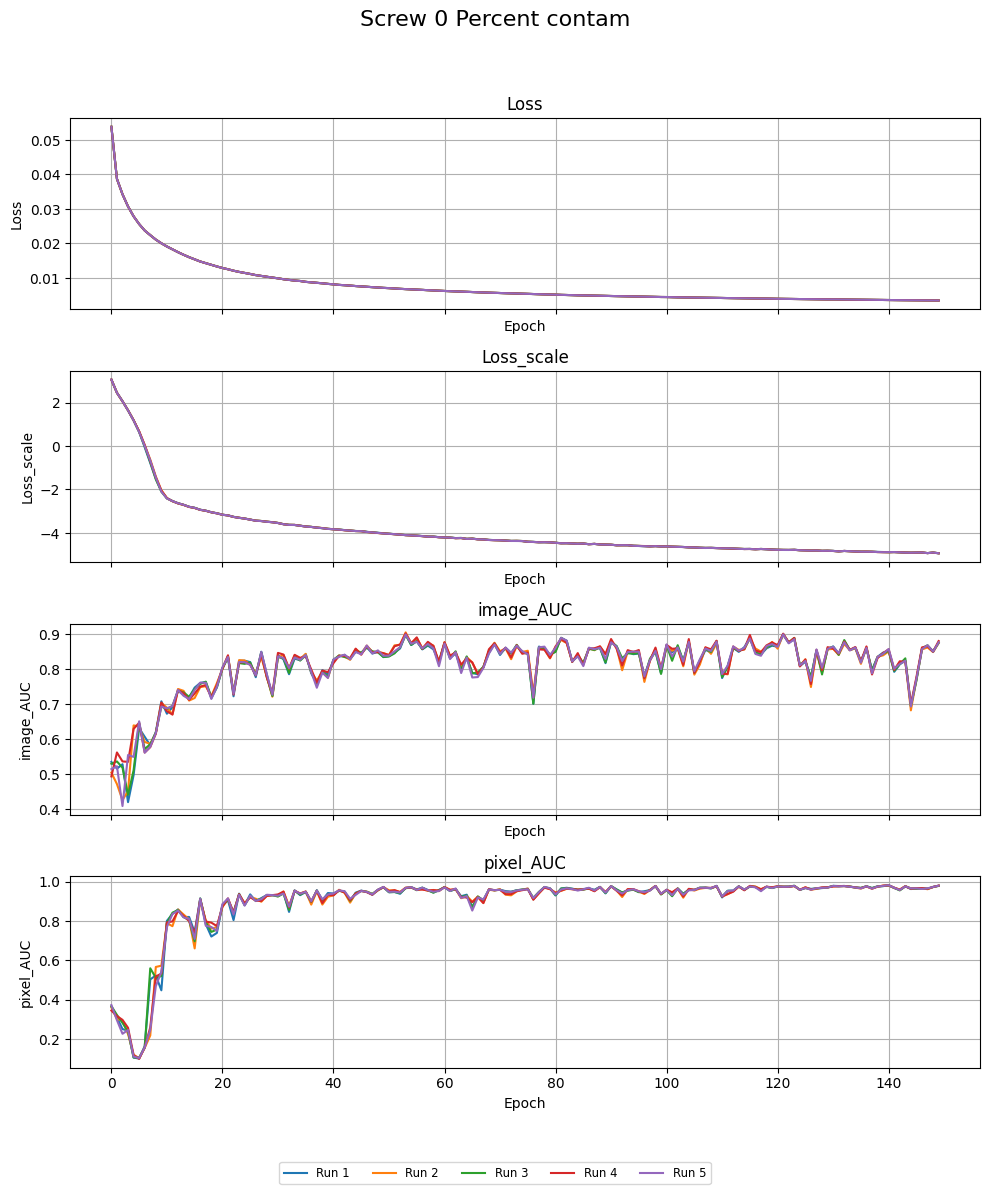

In [6]:
filepaths_sametest_10 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_04_03_24_run_5-screw/args.log'
]
plot_multiple_training_scores(filepaths_sametest_10, title='Screw 10 Percent contam', log_scale=True)

filepaths_sametest_0 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_5-screw/args.log',
]
plot_multiple_training_scores(filepaths_sametest_0, title='Screw 0 Percent contam', log_scale=True)

## FewData

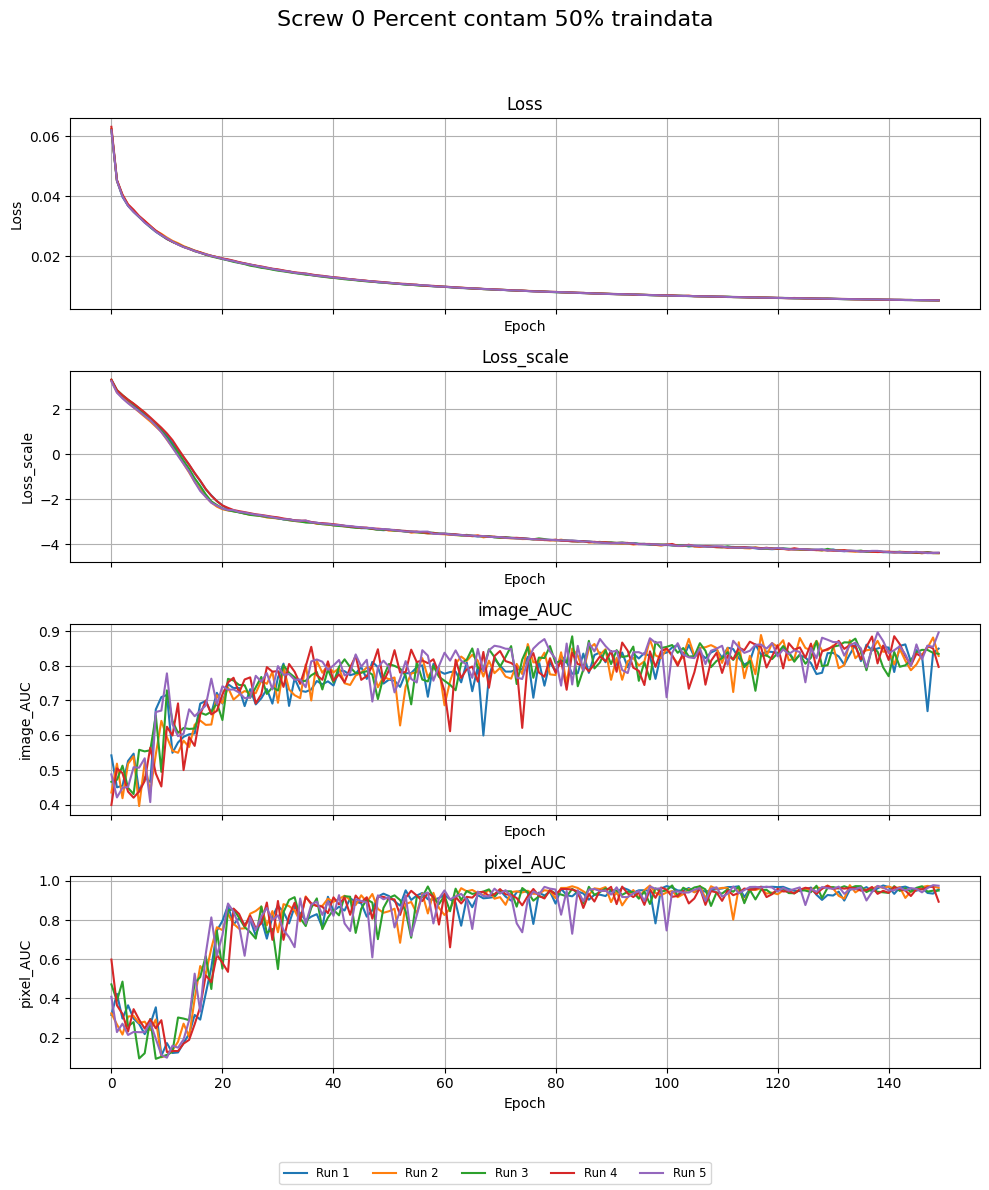

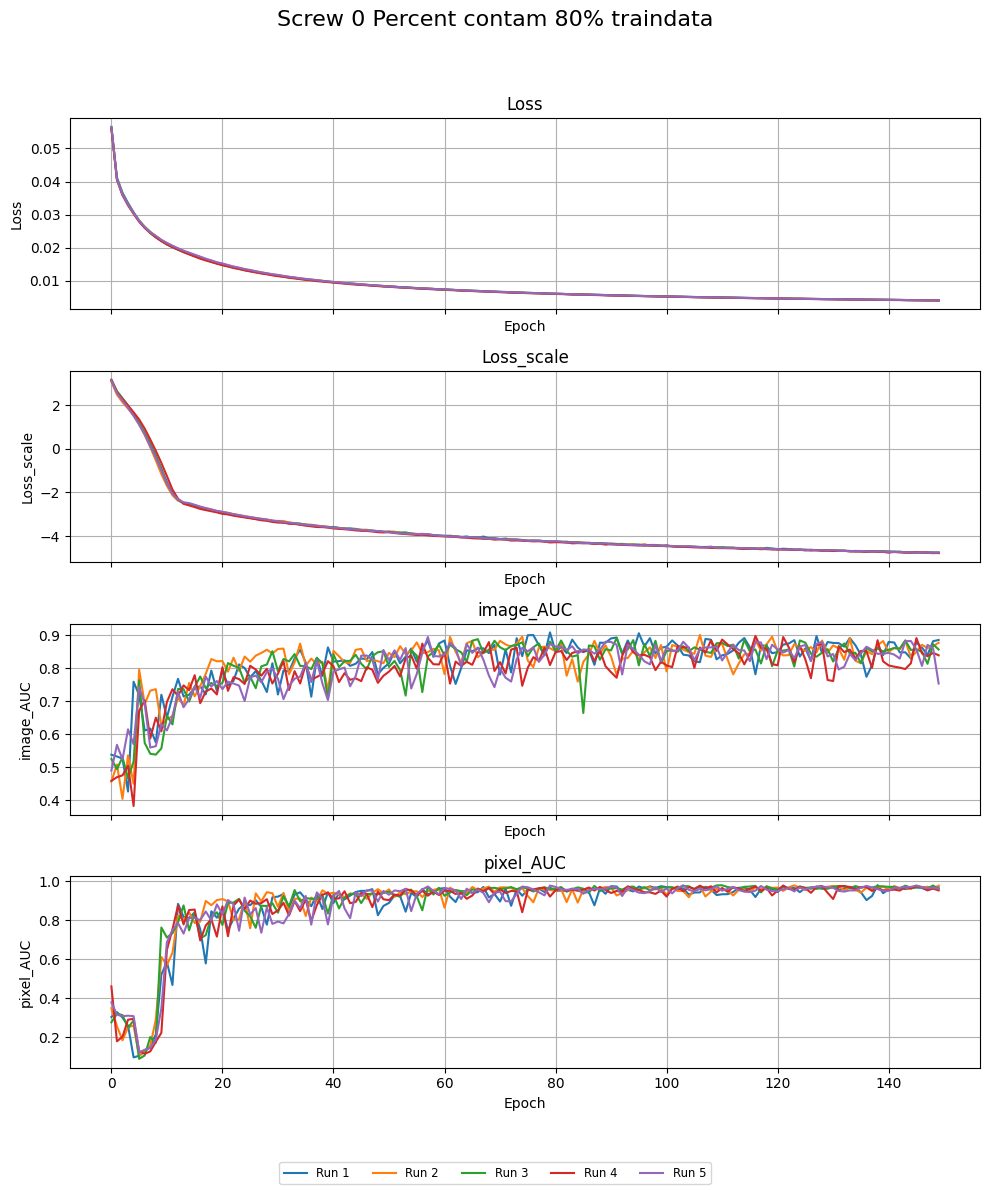

In [7]:
filepaths_clean_50 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_2-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_3-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_4-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_5-screw/args.log',
]
plot_multiple_training_scores(filepaths_clean_50, title='Screw 0 Percent contam 50% traindata', log_scale=True)

filepaths_clean_80 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_6-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_7-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_8-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_9-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_03_05_24_run_10-screw/args.log',
]
plot_multiple_training_scores(filepaths_clean_80, title='Screw 0 Percent contam 80% traindata', log_scale=True)

<Axes: xlabel='epoch', ylabel='Loss'>

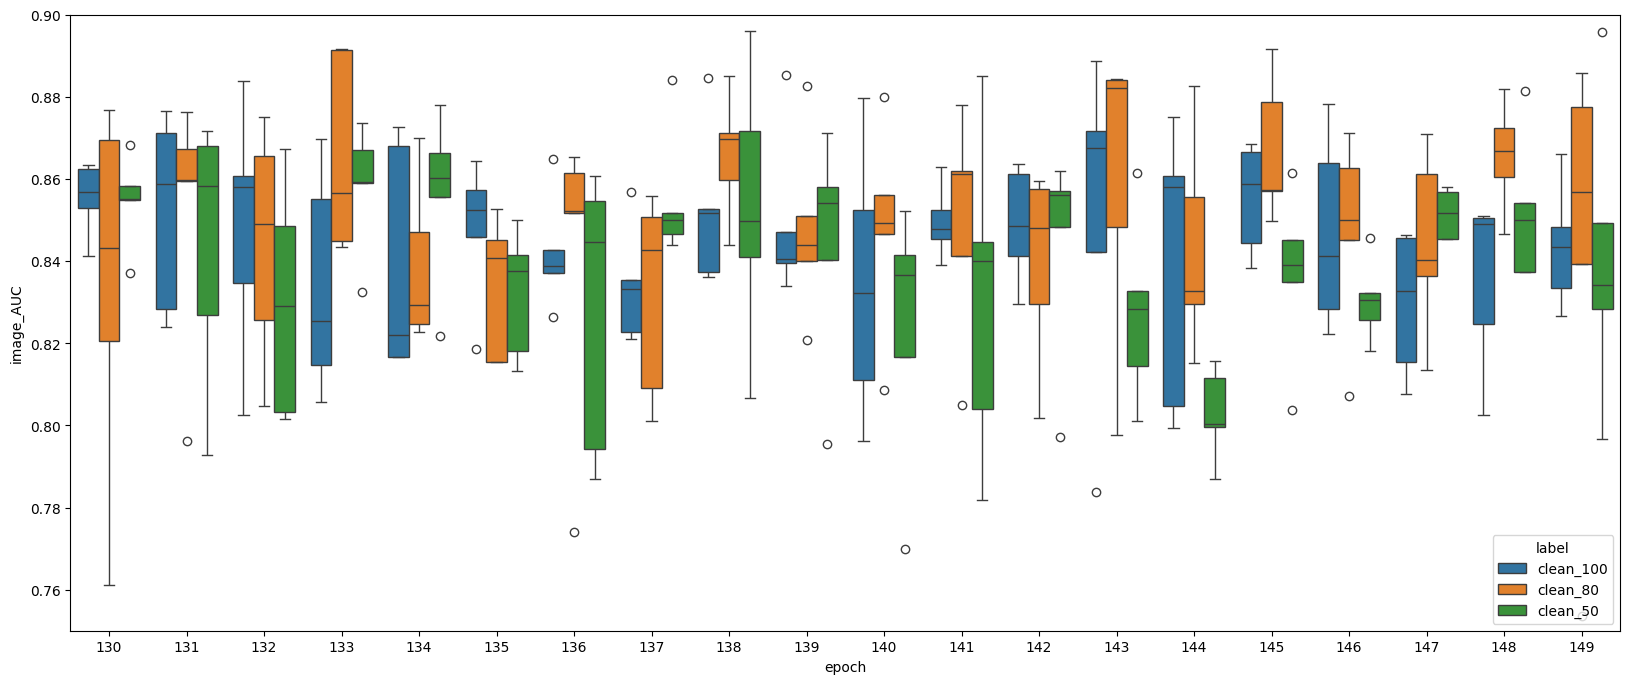

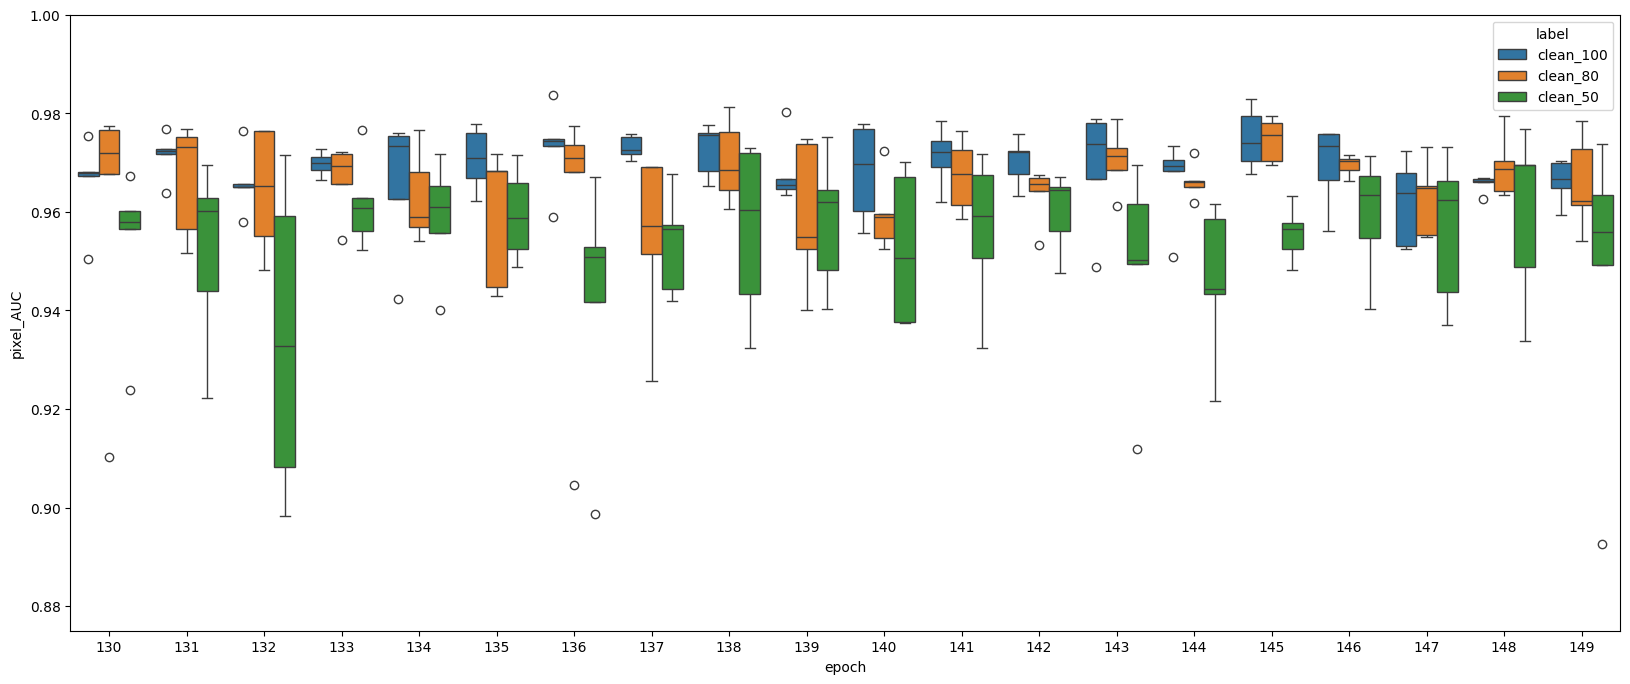

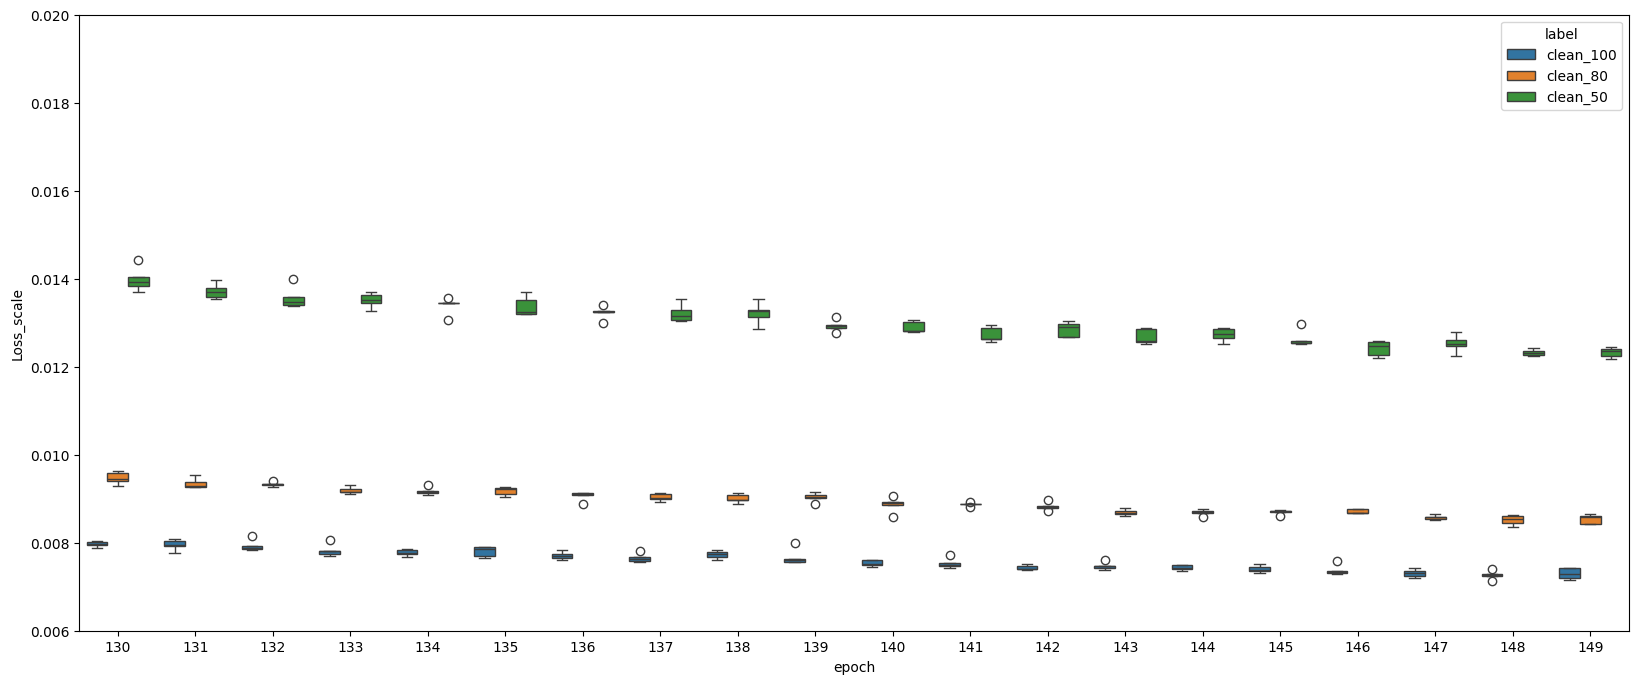

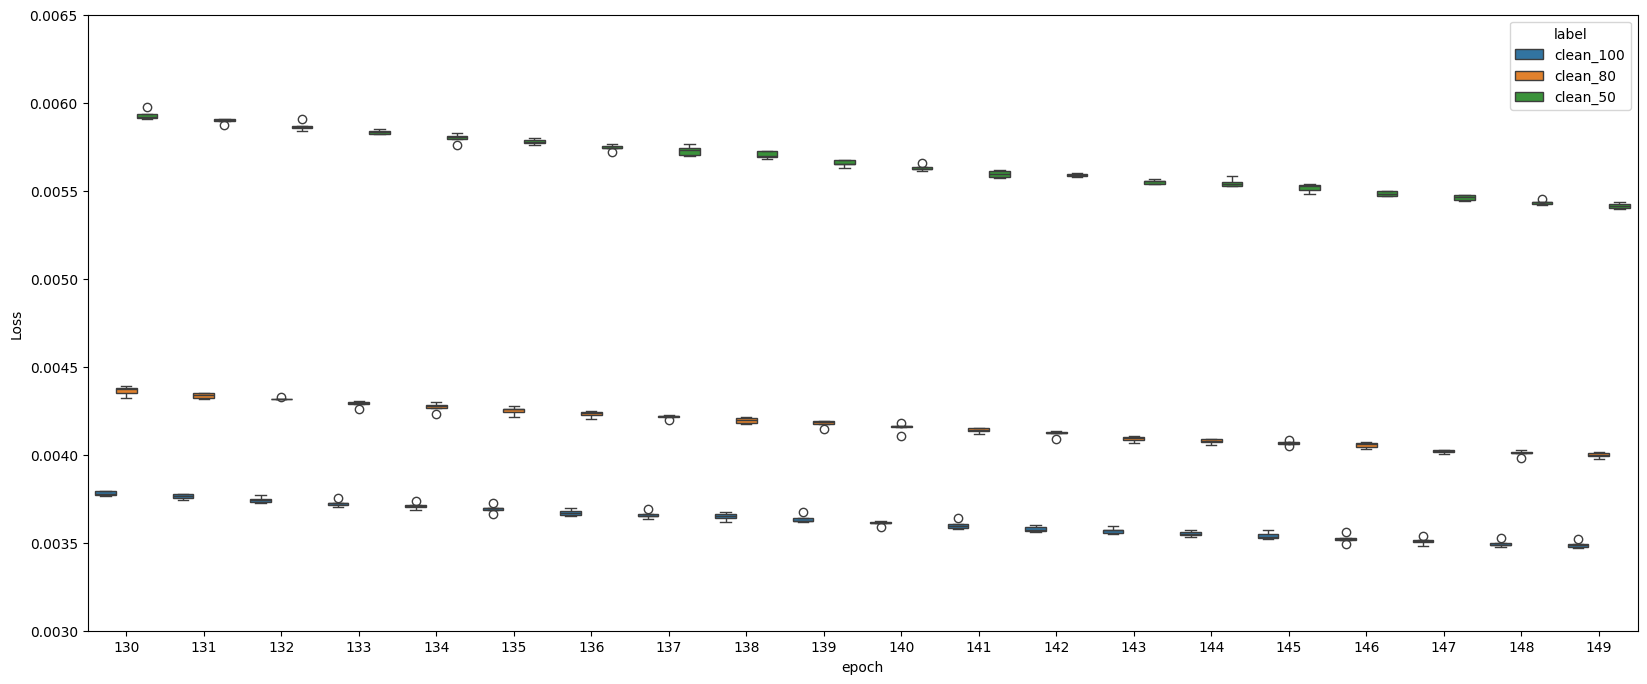

In [8]:
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(20, 8))
plt.ylim(0.75,0.9)

resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'image_AUC']=df['image_AUC'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'image_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

resdf

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="image_AUC",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.875,1)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'pixel_AUC']=df['pixel_AUC'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'pixel_AUC'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="pixel_AUC",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.006,0.02)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss_scale']=df['Loss_scale'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'Loss_scale'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="Loss_scale",hue="label",
            data=resdf)

plt.figure(figsize=(20, 8))
plt.ylim(0.003,0.0065)
resdf=[]#pd.DataFrame({})
for i,filepath in enumerate(filepaths_clean_100):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_100"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_80):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_80"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
for i,filepath in enumerate(filepaths_clean_50):
    resdict = read_training_scores(filepath)
    newdf={}
    df = pd.DataFrame(resdict)
    newdf[f'Loss']=df['Loss'][-20:]
    newdf[f'label']=[f"clean_50"]*len( newdf[f'Loss'])
    newdf[f'epoch']=np.arange(130,150)
    newdf=pd.DataFrame(newdf)
    resdf.append(newdf)
    
resdf = pd.concat(resdf)

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="epoch", y="Loss",hue="label",
            data=resdf)

In [9]:
# plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="screw" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
# plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="bottle",reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
# plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="cable" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])

## single runs 

In [10]:
# #contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="leather")
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="screw")
# plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="metal_nut")

In [11]:
# plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
# plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

# OTHERS

In [12]:
filepaths_clean_100 = [
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw/args.log',
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw/args.log',  
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw/args.log', 
    '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw/args.log', ]

### statistically

In [13]:
exp_name= "Exp_07_06"
root= '/home/bule/projects/UTRAD/results/mvtec/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    conf = json.load(file)
    
    
category_list= list(conf['anomaly_categories'].keys())
run_range= np.arange(1,6)

res_df=[]


for category in category_list:
    logfile_paths= []
    runs=[]
    
    
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)  
            runs.append(run) 
            
    lastrow_df=last_rows_metric(logfile_paths)        
    lastrow_df['path']=logfile_paths        
    lastrow_df['run']=runs

    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['10']*len(lastrow_df)
    lastrow_df['setting']= ['contaminated']*len(lastrow_df)
    res_df.append(lastrow_df)
    
    logfile_paths= []
    runs=[]
    for run in run_range:
        logfile_path = os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
            runs.append(run)  
            
    
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['path']=logfile_paths
    lastrow_df['run']=runs

    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['10']*len(lastrow_df)
    lastrow_df['setting']= ['clean_reduced']*len(lastrow_df)
    res_df.append(lastrow_df)
    
    
    for run in run_range:
        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        
        if os.path.exists(gauss_path):
            
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['path']=gauss_path
            gausdict['run']=run
            gausdict['category']=category
            gausdict['postprocessing']="Gaussian Smoothing"
            gausdict['contamination']= '10'
            res_df.append(gausdict)

        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        
        if os.path.exists(gauss_path):
            
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['path']=gauss_path
            gausdict['category']=category
            gausdict['run']=run
            gausdict['postprocessing']="Gaussian Smoothing"
            gausdict['contamination']= '10'
            res_df.append(gausdict)
            
contam_df= pd.concat(res_df)

print(contam_df.head())


       Loss  Loss_scale  image_AUC  pixel_AUC  \
0  0.005161    0.011880   0.976667   0.923111   
1  0.005150    0.012257   0.982222   0.897322   
2  0.005121    0.012099   0.960000   0.897052   
3  0.005136    0.012225   0.984444   0.947046   
4  0.005166    0.012169   0.982222   0.931874   

                                                path  run category  \
0  /home/bule/projects/UTRAD/results/mvtec/contam...    1   bottle   
1  /home/bule/projects/UTRAD/results/mvtec/contam...    2   bottle   
2  /home/bule/projects/UTRAD/results/mvtec/contam...    3   bottle   
3  /home/bule/projects/UTRAD/results/mvtec/contam...    4   bottle   
4  /home/bule/projects/UTRAD/results/mvtec/contam...    5   bottle   

  postprocessing contamination       setting  
0       original            10  contaminated  
1       original            10  contaminated  
2       original            10  contaminated  
3       original            10  contaminated  
4       original            10  contaminated  


       Loss  Loss_scale  image_AUC  pixel_AUC  \
0  0.005161    0.011880   0.976667   0.923111   
1  0.005150    0.012257   0.982222   0.897322   
2  0.005121    0.012099   0.960000   0.897052   
3  0.005136    0.012225   0.984444   0.947046   
4  0.005166    0.012169   0.982222   0.931874   

                                                path  run category  \
0  /home/bule/projects/UTRAD/results/mvtec/contam...    1   bottle   
1  /home/bule/projects/UTRAD/results/mvtec/contam...    2   bottle   
2  /home/bule/projects/UTRAD/results/mvtec/contam...    3   bottle   
3  /home/bule/projects/UTRAD/results/mvtec/contam...    4   bottle   
4  /home/bule/projects/UTRAD/results/mvtec/contam...    5   bottle   

  postprocessing contamination       setting  
0       original            10  contaminated  
1       original            10  contaminated  
2       original            10  contaminated  
3       original            10  contaminated  
4       original            10  contaminated  


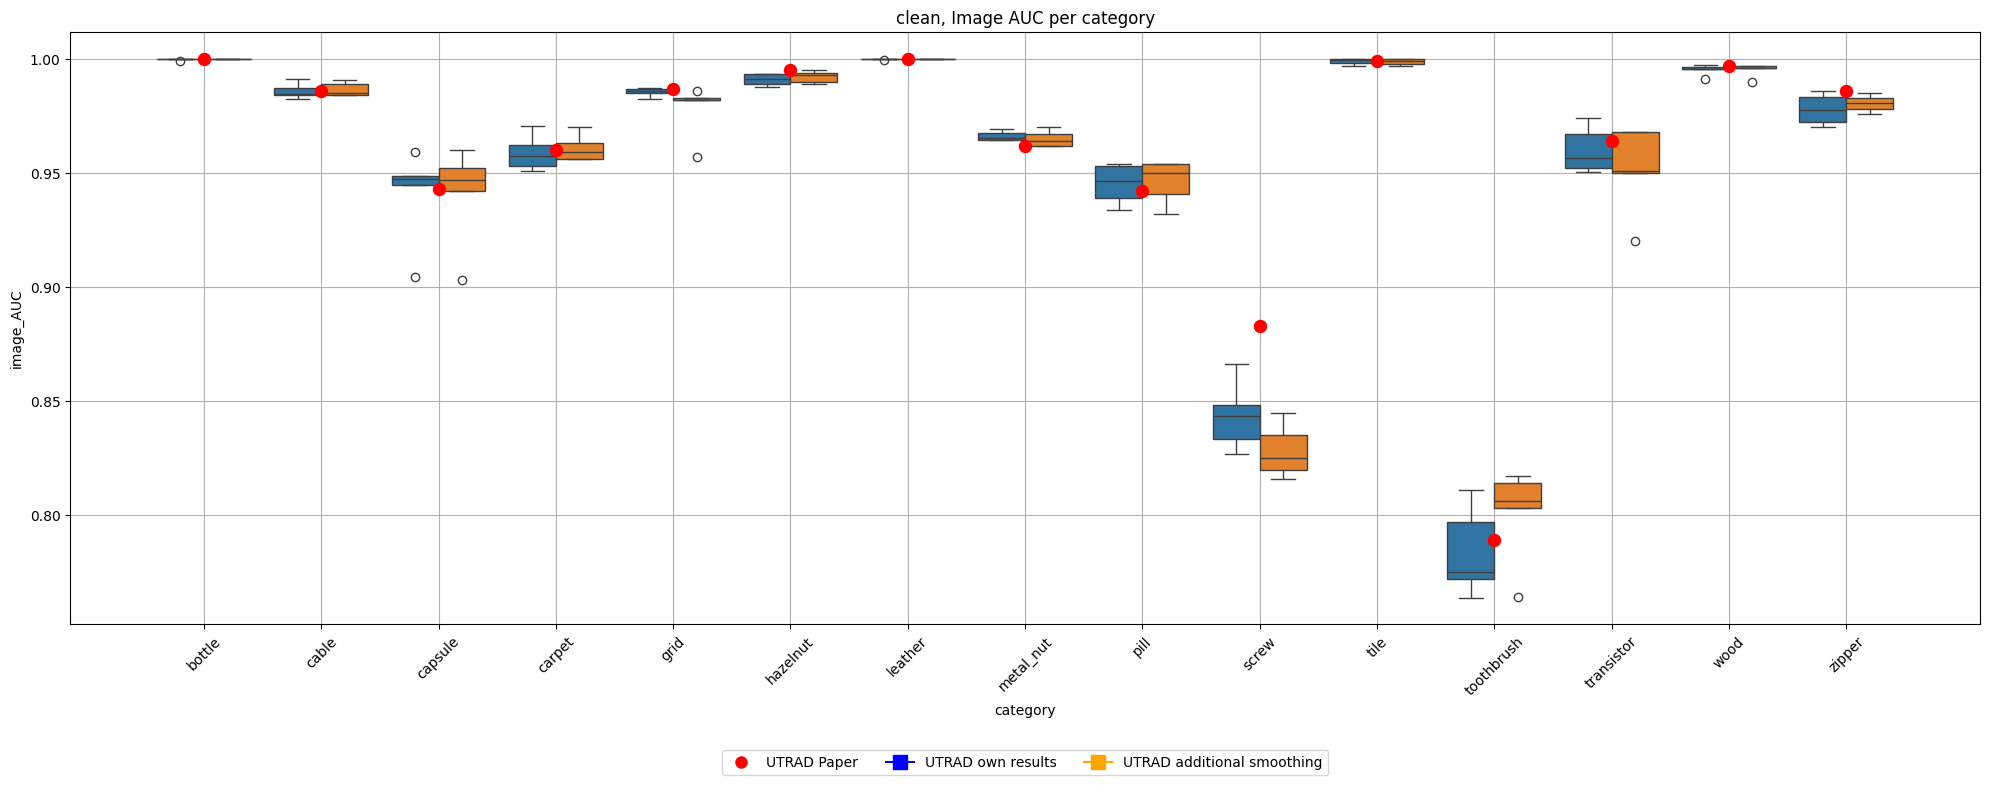

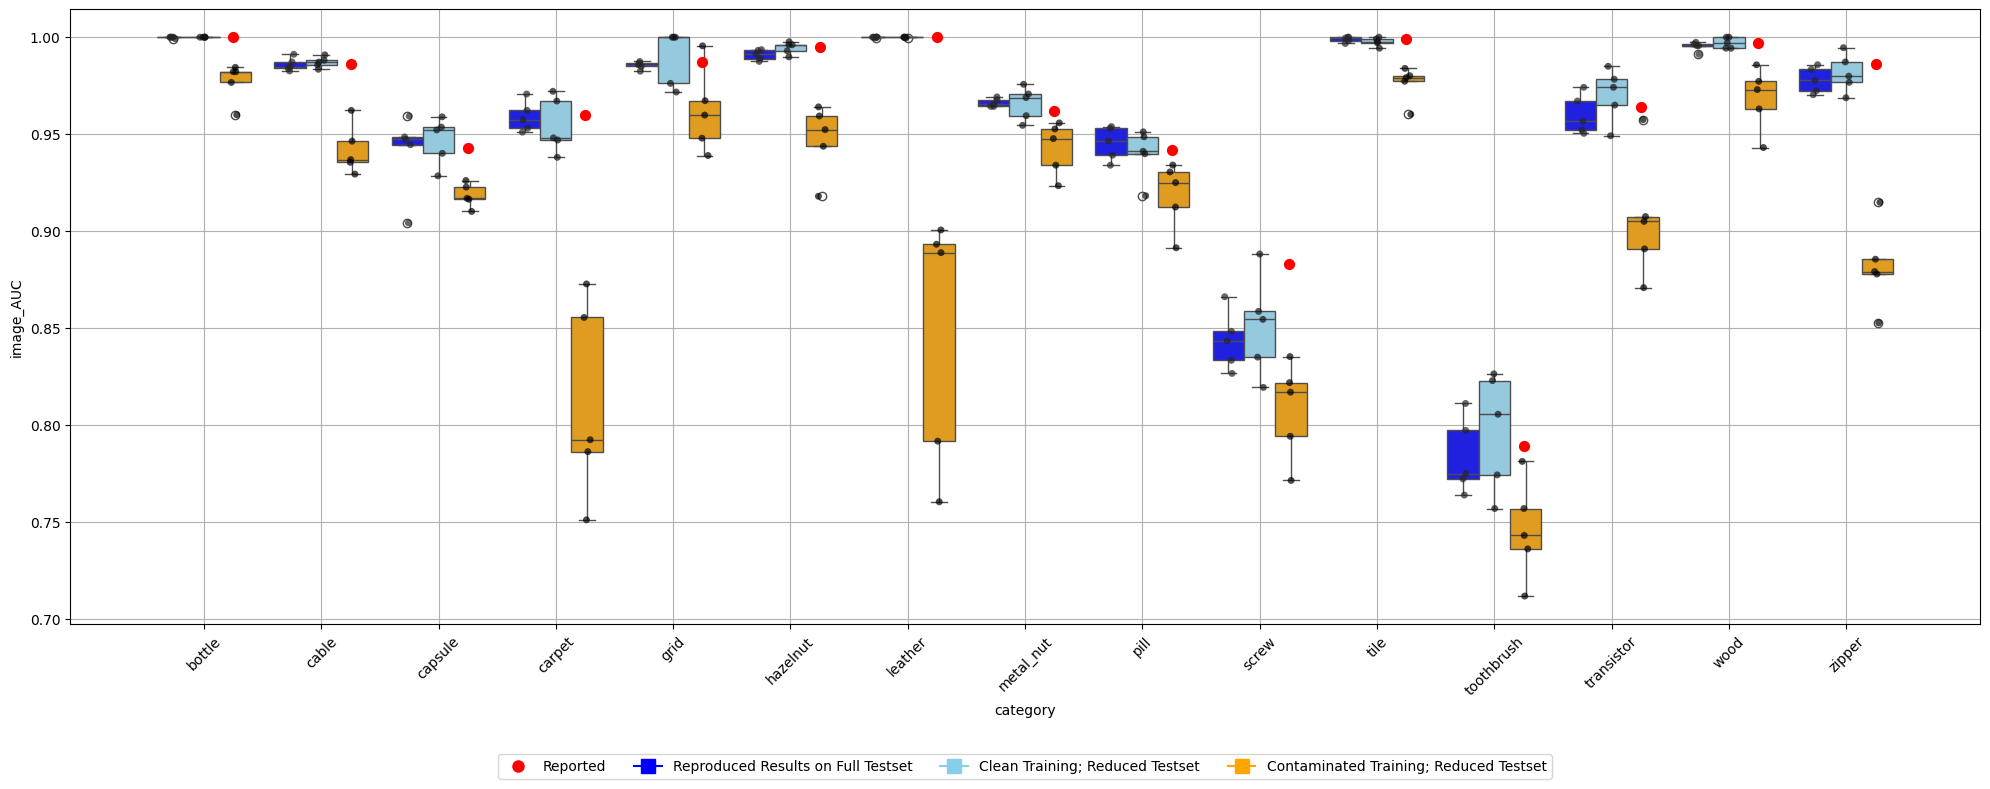

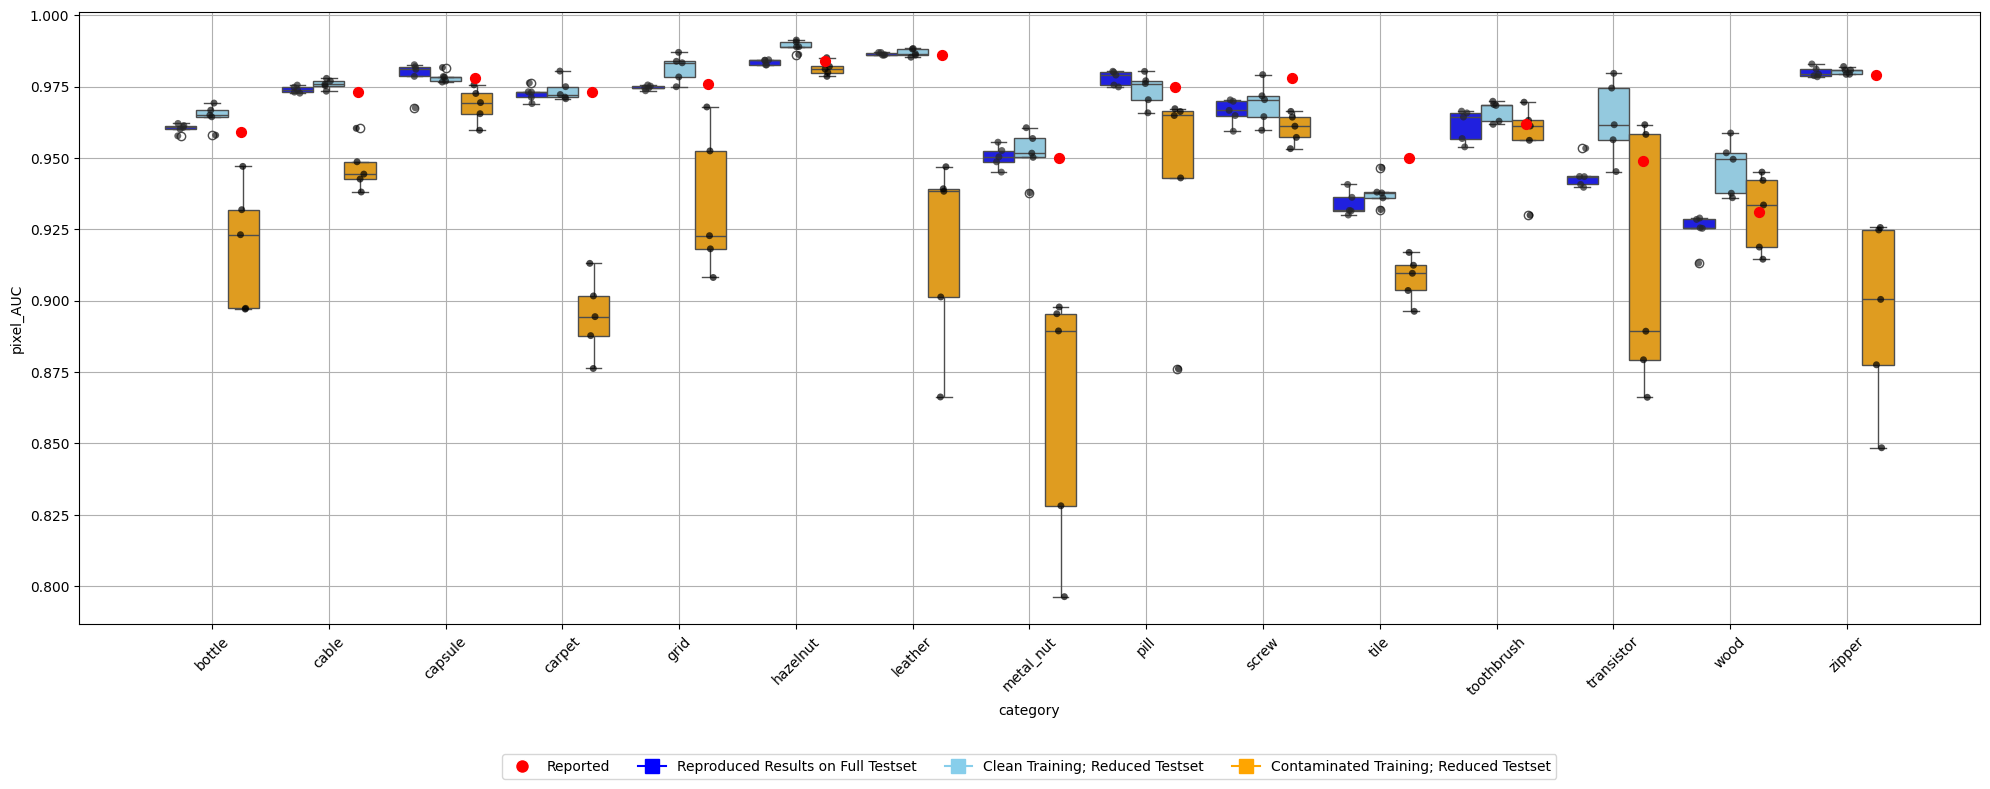

In [14]:
import ipywidgets as widgets

epoch=1 # how many epoch from the last back ,1 = laSt epcoh, 2 = second last epoch etc

exp_name= "Exp_07_06"
root= '/home/bule/projects/UTRAD/results/mvtec/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    conf = json.load(file)
category_list= list(conf['anomaly_categories'].keys())
run_range= np.arange(1,6)

res_df=[]


for category in category_list:
    logfile_paths= []
    runs=[]
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)  
            runs.append(run) 
            
    lastrow_df=last_rows_metric(logfile_paths,-epoch)        
    lastrow_df['path']=logfile_paths        
    lastrow_df['run']=runs

    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['10']*len(lastrow_df)
    lastrow_df['setting']= ['contaminated']*len(lastrow_df)
    res_df.append(lastrow_df)
    
    logfile_paths= []
    runs=[]
    for run in run_range:
        logfile_path = os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
            runs.append(run)  
            
    
    lastrow_df=last_rows_metric(logfile_paths,-epoch)
    lastrow_df['path']=logfile_paths
    lastrow_df['run']=runs

    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['10']*len(lastrow_df)
    lastrow_df['setting']= ['clean_reduced']*len(lastrow_df)
    res_df.append(lastrow_df)
    
    
    for run in run_range:
        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        
        if os.path.exists(gauss_path):
            
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['path']=gauss_path
            gausdict['run']=run
            gausdict['category']=category
            gausdict['postprocessing']="Gaussian Smoothing"
            gausdict['contamination']= '10'
            res_df.append(gausdict)

        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        
        if os.path.exists(gauss_path):
            
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['path']=gauss_path
            gausdict['category']=category
            gausdict['run']=run
            gausdict['postprocessing']="Gaussian Smoothing"
            gausdict['contamination']= '10'
            res_df.append(gausdict)
            
contam_df= pd.concat(res_df)

print(contam_df.head())

palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}

exp_name= "Exp_04_06_24"
root= '/home/bule/projects/UTRAD/results/mvtec/contamination_0/'


with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
    conf = json.load(file)

category_list= list(conf['anomaly_categories'].keys())
run_range= np.arange(1,6)

res_df=[]

for category in category_list:
    logfile_paths= []
    runs=[]
    for run in run_range:
        
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)  
            runs.append(run)
            
    lastrow_df=last_rows_metric(logfile_paths,-epoch)
    lastrow_df['path']=logfile_paths
    lastrow_df['run']=runs
    
    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['0']*len(lastrow_df)
    lastrow_df['setting']= ['clean']*len(lastrow_df)
    res_df.append(lastrow_df)
    
    for run in run_range:
        gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
        if os.path.exists(gauss_path):
            gausdict=pd.DataFrame(extract_auc_values(gauss_path))
            gausdict['path']=gauss_path
            gausdict['category']=category
            gausdict['postprocessing']="Gaussian Smoothing"
            gausdict['contamination']= '0'
            gausdict['setting']= 'clean'
            res_df.append(gausdict)


res_df=pd.concat(res_df)


hue_order = ['clean', 'clean_reduced', 'contaminated']


auc_paper = {'bottle': 1,'cable': 0.986,'capsule': 0.943,'carpet': 0.96,'grid': 0.987,'hazelnut': 0.995,'leather': 1,'metal_nut': 0.962,'pill': 0.942,'screw': 0.883,'tile': 0.999,'toothbrush': 0.789,'transistor': 0.964,'wood': 0.997,'zipper': 0.986}
plt.figure(figsize=(20, 8))
plt.title('clean, Image AUC per category')

ax = sns.boxplot(x="category", y="image_AUC", hue="postprocessing", data=res_df)

for category, auc in auc_paper.items():
    ax.scatter(x=category, y=auc, color='red', s=75, zorder=5)
plt.grid(True)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='UTRAD Paper', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue', label='UTRAD own results', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='UTRAD additional smoothing', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



fulldf= pd.concat([contam_df,res_df ])


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="image_AUC", hue="setting",hue_order=hue_order, data=fulldf[fulldf['postprocessing']=='original'], zorder=2,palette=palette)
sns.stripplot(data=fulldf[fulldf['postprocessing']=='original'], x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_paper.items():
    x_position = list(fulldf['category'].unique()).index(category) + 0.25
    ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

ax.grid(True, zorder=1)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Reported', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Results on Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]


ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


res_df=[]
for category in category_list:
    logfile_paths= []
    runs=[]
    for run in run_range:
        
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)  
            runs.append(run)
            
    lastrow_df=last_rows_metric(logfile_paths,-epoch)
    lastrow_df['path']=logfile_paths
    lastrow_df['run']=runs
    
    lastrow_df['category']= [category]*len(lastrow_df)
    lastrow_df['postprocessing']= ['original']*len(lastrow_df)
    lastrow_df['contamination']= ['0']*len(lastrow_df)
    lastrow_df['setting']= ['clean']*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df=pd.concat(res_df)

#pixel_auc
auc_paper = {'bottle': 0.959,'cable': 0.973,'capsule': 0.978,'carpet': 0.973,'grid': 0.976,'hazelnut': 0.984,'leather':0.986,'metal_nut': 0.95,'pill': 0.975,'screw': 0.978,'tile': 0.95,'toothbrush': 0.962,'transistor': 0.949,'wood': 0.931,'zipper': 0.979}

fulldf= pd.concat([contam_df,res_df ])


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="pixel_AUC", hue="setting", data=fulldf[fulldf['postprocessing']=='original'], zorder=2,hue_order=hue_order,palette=palette)
sns.stripplot(data=fulldf[fulldf['postprocessing']=='original'], x="category", y="pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_paper.items():
    x_position = list(fulldf['category'].unique()).index(category) + 0.25
    ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

ax.grid(True, zorder=1)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Reported', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Results on Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title
plt.show()




# epoch_slider = widgets.IntSlider(value=1,min=0,max=20,step=1,description='Epoch:')
# widgets.interact(plot_boxplot_compare, epoch=epoch_slider)

### slider over epochs

In [15]:
def plot_df(epoch,save=False):
    exp_name= "Exp_07_06"
    root= '/home/bule/projects/UTRAD/results/mvtec/contamination_10/'

    with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
        conf = json.load(file)
        
        
    category_list= list(conf['anomaly_categories'].keys())
    run_range= np.arange(1,6)

    res_df=[]


    for category in category_list:
        logfile_paths= []
        runs=[]
        
        
        for run in run_range:
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
            if os.path.exists(logfile_path):
                logfile_paths.append(logfile_path)  
                runs.append(run) 
                
        lastrow_df=last_rows_metric(logfile_paths,-epoch)        
        lastrow_df['path']=logfile_paths        
        lastrow_df['run']=runs

        lastrow_df['category']= [category]*len(lastrow_df)
        lastrow_df['postprocessing']= ['original']*len(lastrow_df)
        lastrow_df['contamination']= ['10']*len(lastrow_df)
        lastrow_df['setting']= ['contaminated']*len(lastrow_df)
        res_df.append(lastrow_df)
        
        logfile_paths= []
        runs=[]
        for run in run_range:
            logfile_path = os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
            if os.path.exists(logfile_path):
                logfile_paths.append(logfile_path)
                runs.append(run)  
                
        
        lastrow_df=last_rows_metric(logfile_paths,-epoch)
        lastrow_df['path']=logfile_paths
        lastrow_df['run']=runs

        lastrow_df['category']= [category]*len(lastrow_df)
        lastrow_df['postprocessing']= ['original']*len(lastrow_df)
        lastrow_df['contamination']= ['10']*len(lastrow_df)
        lastrow_df['setting']= ['clean_reduced']*len(lastrow_df)
        res_df.append(lastrow_df)
        
        
        for run in run_range:
            gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
            
            if os.path.exists(gauss_path):
                
                gausdict=pd.DataFrame(extract_auc_values(gauss_path))
                gausdict['path']=gauss_path
                gausdict['run']=run
                gausdict['category']=category
                gausdict['postprocessing']="Gaussian Smoothing"
                gausdict['contamination']= '10'
                res_df.append(gausdict)

            gauss_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'Additional_Gausskernel.log')
            
            if os.path.exists(gauss_path):
                
                gausdict=pd.DataFrame(extract_auc_values(gauss_path))
                gausdict['path']=gauss_path
                gausdict['category']=category
                gausdict['run']=run
                gausdict['postprocessing']="Gaussian Smoothing"
                gausdict['contamination']= '10'
                res_df.append(gausdict)
                
    contam_df= pd.concat(res_df)




    exp_name= "Exp_04_06_24"
    root= '/home/bule/projects/UTRAD/results/mvtec/contamination_0/'


    with open('/home/bule/projects/UTRAD/configurations/mvtec.json', 'r') as file:
        conf = json.load(file)
        
        

    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        for run in run_range:
            
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
            if os.path.exists(logfile_path):
                logfile_paths.append(logfile_path)  
                runs.append(run)
                
        lastrow_df=last_rows_metric(logfile_paths,-epoch)
        lastrow_df['path']=logfile_paths
        lastrow_df['run']=runs
        
        lastrow_df['category']= [category]*len(lastrow_df)
        lastrow_df['postprocessing']= ['original']*len(lastrow_df)
        lastrow_df['contamination']= ['0']*len(lastrow_df)
        lastrow_df['setting']= ['clean']*len(lastrow_df)
        res_df.append(lastrow_df)
        
    res_df=pd.concat(res_df)

    #pixel_auc
    #auc_paper = {'bottle': 0.959,'cable': 0.973,'capsule': 0.978,'carpet': 0.973,'grid': 0.976,'hazelnut': 0.984,'leather':0.986,'metal_nut': 0.95,'pill': 0.975,'screw': 0.978,'tile': 0.95,'toothbrush': 0.962,'transistor': 0.949,'wood': 0.931,'zipper': 0.979}

    #@imauc
    auc_paper = {'bottle': 1,'cable': 0.986,'capsule': 0.943,'carpet': 0.96,'grid': 0.987,'hazelnut': 0.995,'leather': 1,'metal_nut': 0.962,'pill': 0.942,'screw': 0.883,'tile': 0.999,'toothbrush': 0.789,'transistor': 0.964,'wood': 0.997,'zipper': 0.986}



    fulldf= pd.concat([contam_df,res_df ])


    plt.figure(figsize=(20, 8))
    ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=fulldf[fulldf['postprocessing']=='original'], zorder=2)
    sns.stripplot(data=fulldf[fulldf['postprocessing']=='original'], x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax)

    for category, auc in auc_paper.items():
        x_position = list(fulldf['category'].unique()).index(category) + 0.25
        ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

    ax.grid(True, zorder=1)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Reported', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='s', color='green',  label='Reproduced Results on Full Testset', markersize=10),
        plt.Line2D([0], [0], marker='s', color='darkorange', label='Clean Training; Reduced Testset', markersize=10),
        plt.Line2D([0], [0], marker='s', color='blue', label='Contaminated Training; Reduced Testset', markersize=10)
    ]

    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title(f'Epoch {151-epoch}')
    plt.ylim(0.75,1.01)
    if save:
        
        filename = f'/home/bule/projects/UTRAD/results/mvtec/overall_results/plot_{151-epoch}.png'
        plt.savefig(filename)
        print(f'Saved {filename}')
    else:
        plt.show()

### gfi creation

In [16]:
# import os
# from PIL import Image
# for epoch in range(1,150):
#     plot_df(epoch,save=True)



# # Parameters
# input_folder = '/home/bule/projects/UTRAD/results/mvtec/overall_results' # The folder where the images are stored
# output_file = 'evolution.gif'  # The output GIF file
# num_images = 149  # Number of images

# # Create a list of image file paths
# image_files = [f'plot_{i}.png' for i in range(2, num_images + 1)]

# # Load images
# images = [Image.open(os.path.join(input_folder, file)) for file in image_files]

# # Save as a GIF
# images[0].save(output_file, save_all=True, append_images=images[1:], duration=300, loop=0)

# print(f'GIF saved as {output_file}')


IntSlider(value=130, description='Columns:', max=150, min=1)

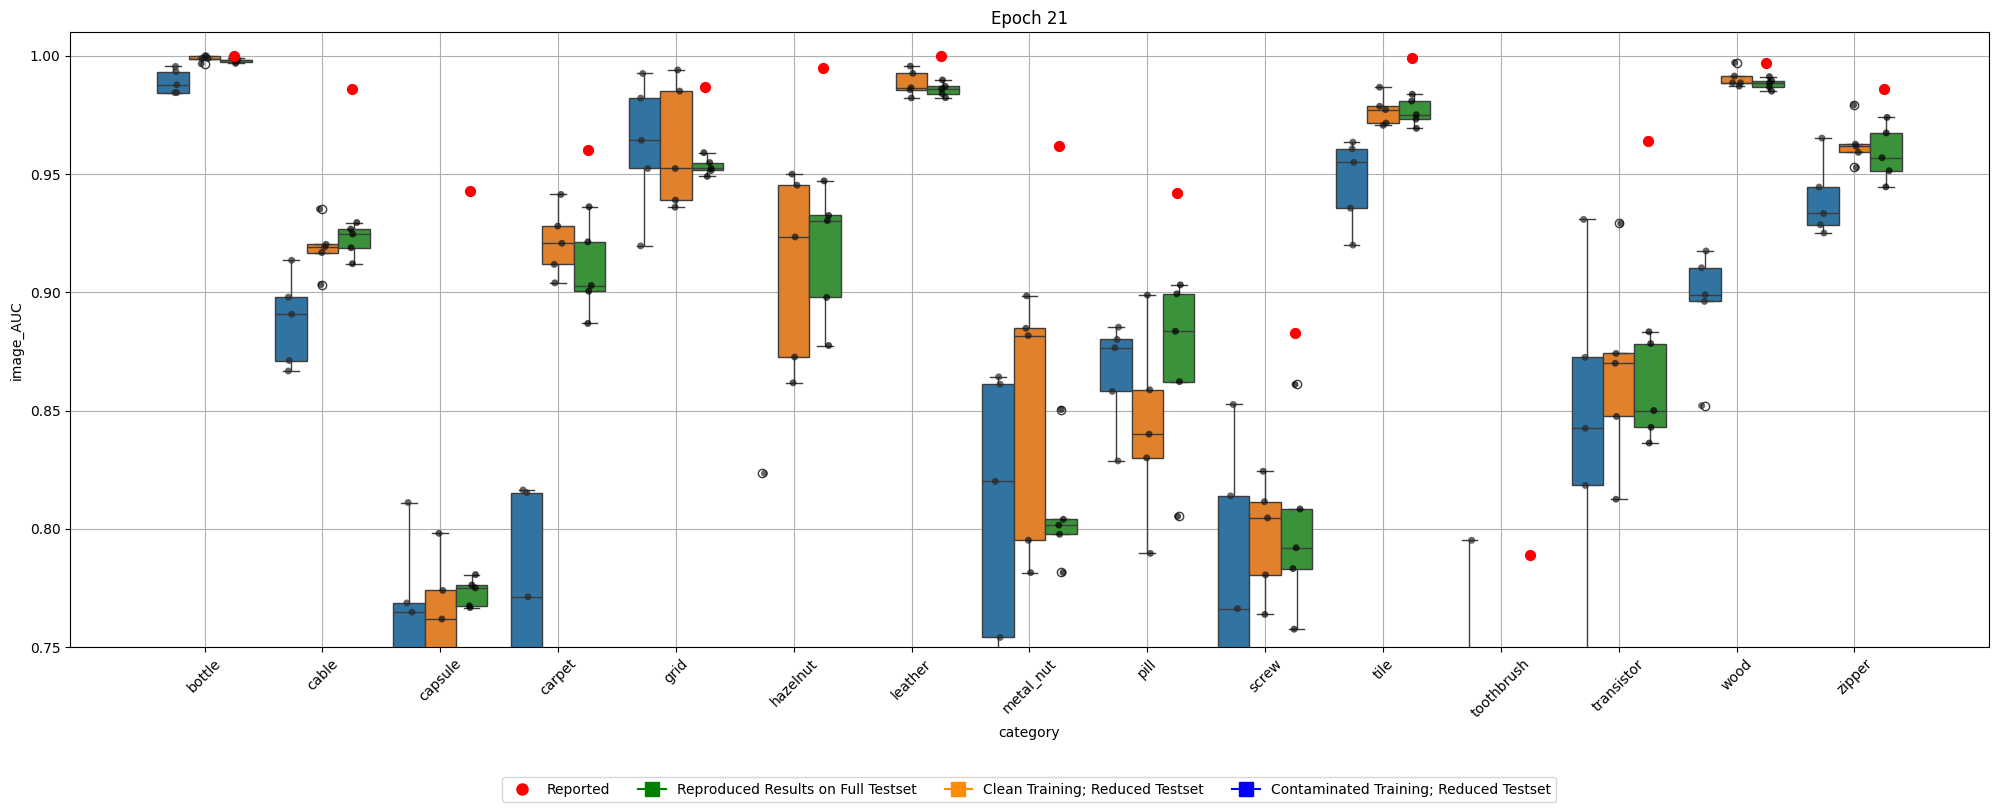

In [23]:

import ipywidgets as widgets
from IPython.display import display, clear_output


slider = widgets.IntSlider(value=1, min=1, max=150, step=1, description='Columns:')

def update_plot(change):
    clear_output(wait=True)  # Clear the previous plot
    display(slider)  # Redisplay the slider
    plot_df(change['new'])

slider.observe(update_plot, names='value')
display(slider)
plot_df(slider.value)




### leather fewdata

<Axes: xlabel='category', ylabel='image_AUC'>

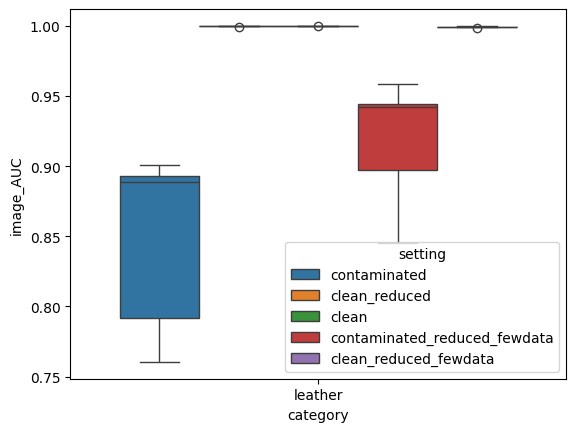

In [18]:
category='leather'
df_list=[]
fewdata_paths=[ '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_FewData_14_06_24_run_1-leather',
                '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_FewData_14_06_24_run_2-leather',
                '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_FewData_14_06_24_run_3-leather',
                '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_FewData_14_06_24_run_4-leather',
                '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_FewData_14_06_24_run_5-leather']
fewdata_paths_cont=[os.path.join(path,'args.log') for path in fewdata_paths]
lastrow_df=last_rows_metric(fewdata_paths_cont)        
lastrow_df['path']=fewdata_paths        
lastrow_df['run']=[1,2,3,4,5]

lastrow_df['category']= [category]*len(lastrow_df)
lastrow_df['postprocessing']= ['original']*len(lastrow_df)
lastrow_df['contamination']= ['10']*len(lastrow_df)
lastrow_df['setting']= ['contaminated_reduced_fewdata']*len(lastrow_df)
df_list.append(lastrow_df)
logfile_paths= []
runs=[]
fewdata_paths_cleaned=[os.path.join(path,'args_cleaned.log') for path in fewdata_paths]
lastrow_df=last_rows_metric(fewdata_paths_cleaned )
lastrow_df['path']=fewdata_paths_cleaned
lastrow_df['run']=[1,2,3,4,5]

lastrow_df['category']= [category]*len(lastrow_df)
lastrow_df['postprocessing']= ['original']*len(lastrow_df)
lastrow_df['contamination']= ['10']*len(lastrow_df)
lastrow_df['setting']= ['clean_reduced_fewdata']*len(lastrow_df)

df_list.append(lastrow_df)


leather_few=pd.concat(df_list)
concatdf = pd.concat([fulldf, leather_few])

df=concatdf[(concatdf['postprocessing']=='original') & (concatdf['category']=='leather')]

sns.boxplot(x="category", y="image_AUC", hue="setting", data=df, zorder=2)


In [19]:
sorted=fulldf[fulldf['postprocessing']=='original']
# Assuming 'sorted' is your DataFrame
filtered_df = sorted[(sorted['category'] == 'bottle') & (sorted['setting'] == 'contaminated')]

# Now, sort the filtered DataFrame by 'run' in descending order
result_df = filtered_df.sort_values('run', ascending=False)

result_df

,Loss,Loss_scale,image_AUC,pixel_AUC,path,run,category,postprocessing,contamination,setting
4,0.005166,0.012169,0.982222,0.931874,/home/bule/projects/UTRAD/results/mvtec/contam...,5,bottle,original,10,contaminated
3,0.005136,0.012225,0.984444,0.947046,/home/bule/projects/UTRAD/results/mvtec/contam...,4,bottle,original,10,contaminated
2,0.005121,0.012099,0.960000,0.897052,/home/bule/projects/UTRAD/results/mvtec/contam...,3,bottle,original,10,contaminated
1,0.005150,0.012257,0.982222,0.897322,/home/bule/projects/UTRAD/results/mvtec/contam...,2,bottle,original,10,contaminated
0,0.005161,0.011880,0.976667,0.923111,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated


# ALL DATA

In [71]:
### get def function for path_list


def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', log)
            if os.path.exists(logfile_path):
                logfile_paths.append(logfile_path)  
                logfile_path_names.extend([logfile_path]*150)
                runs.extend([run]*150) 
        
        allrows_df=all_results_conc(logfile_paths)
        allrows_df['path']=logfile_path_names        
        allrows_df['run']=runs
        allrows_df['category']= [category]*len(allrows_df)
        allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
        allrows_df['contamination']= [contamination]*len(allrows_df)
        allrows_df['setting']= [setting]*len(allrows_df)
        res_df.append(allrows_df)
    return  pd.concat(res_df)

allrows_df_end_cont=read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json')
allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args_cleaned.log',exp_name= "Exp_07_06",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json')
allrows_df_end_clean=read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_04_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json')

allres=pd.concat([allrows_df_end_cont,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

,Loss,Loss_scale,image_AUC,pixel_AUC,epoch,path,run,category,postprocessing,contamination,setting
0,0.077954,32.552895,0.461111,0.494562,0,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated
1,0.054798,19.528442,0.387778,0.522120,1,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated
2,0.048600,14.812398,0.618889,0.700073,2,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated
3,0.045123,11.540242,0.582222,0.720804,3,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated
4,0.042593,8.863247,0.718889,0.771189,4,/home/bule/projects/UTRAD/results/mvtec/contam...,1,bottle,original,10,contaminated
...,...,...,...,...,...,...,...,...,...,...,...
745,0.004145,0.009721,0.972426,0.980650,145,/home/bule/projects/UTRAD/results/mvtec/contam...,5,zipper,original,0,clean
746,0.004187,0.010148,0.985819,0.979742,146,/home/bule/projects/UTRAD/results/mvtec/contam...,5,zipper,original,0,clean
747,0.004120,0.009704,0.981092,0.977769,147,/home/bule/projects/UTRAD/results/mvtec/contam...,5,zipper,original,0,clean
748,0.004104,0.009537,0.966649,0.978761,148,/home/bule/projects/UTRAD/results/mvtec/contam...,5,zipper,original,0,clean


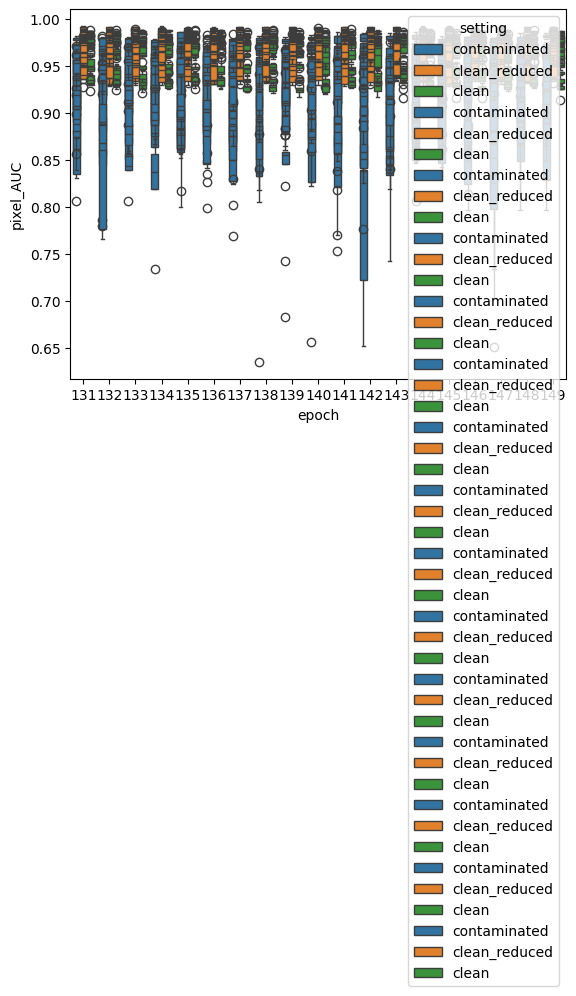

In [87]:

for category in allres['category'].unique():

    allres_epochs=allres[allres['epoch']>130]
    allres_cat=allres_epochs[allres_epochs['category']==category]

    sns.boxplot(x="epoch", y="pixel_AUC",hue="setting",data=allres_cat)

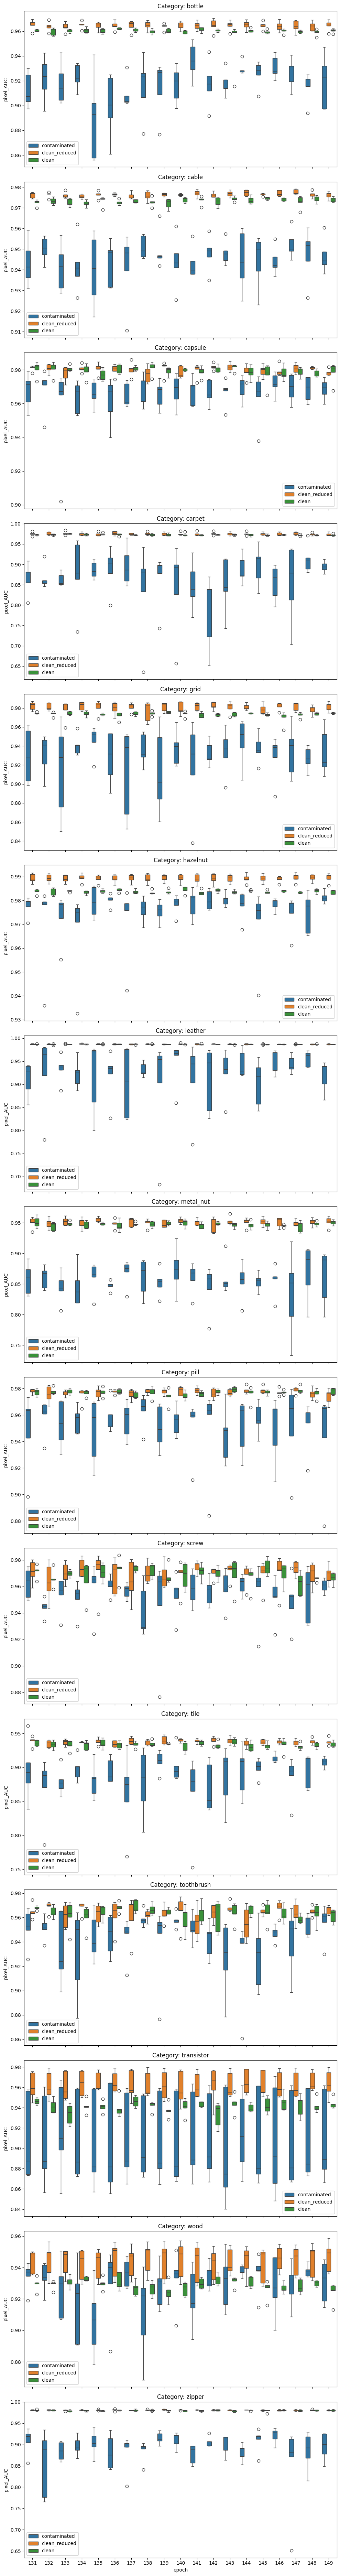

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'allres' is your DataFrame and is already loaded
# Example: allres = pd.read_csv('your_data.csv')

# Filter the DataFrame for epochs greater than 130
allres_epochs = allres[allres['epoch'] > 130]

# Get the unique categories
categories = allres['category'].unique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 5 * len(categories)), sharex=True)

# Ensure that axes is iterable even if there's only one category
if len(categories) == 1:
    axes = [axes]

# Plot each category in a separate subplot
for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="pixel_AUC", hue="setting", data=allres_cat, ax=ax)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


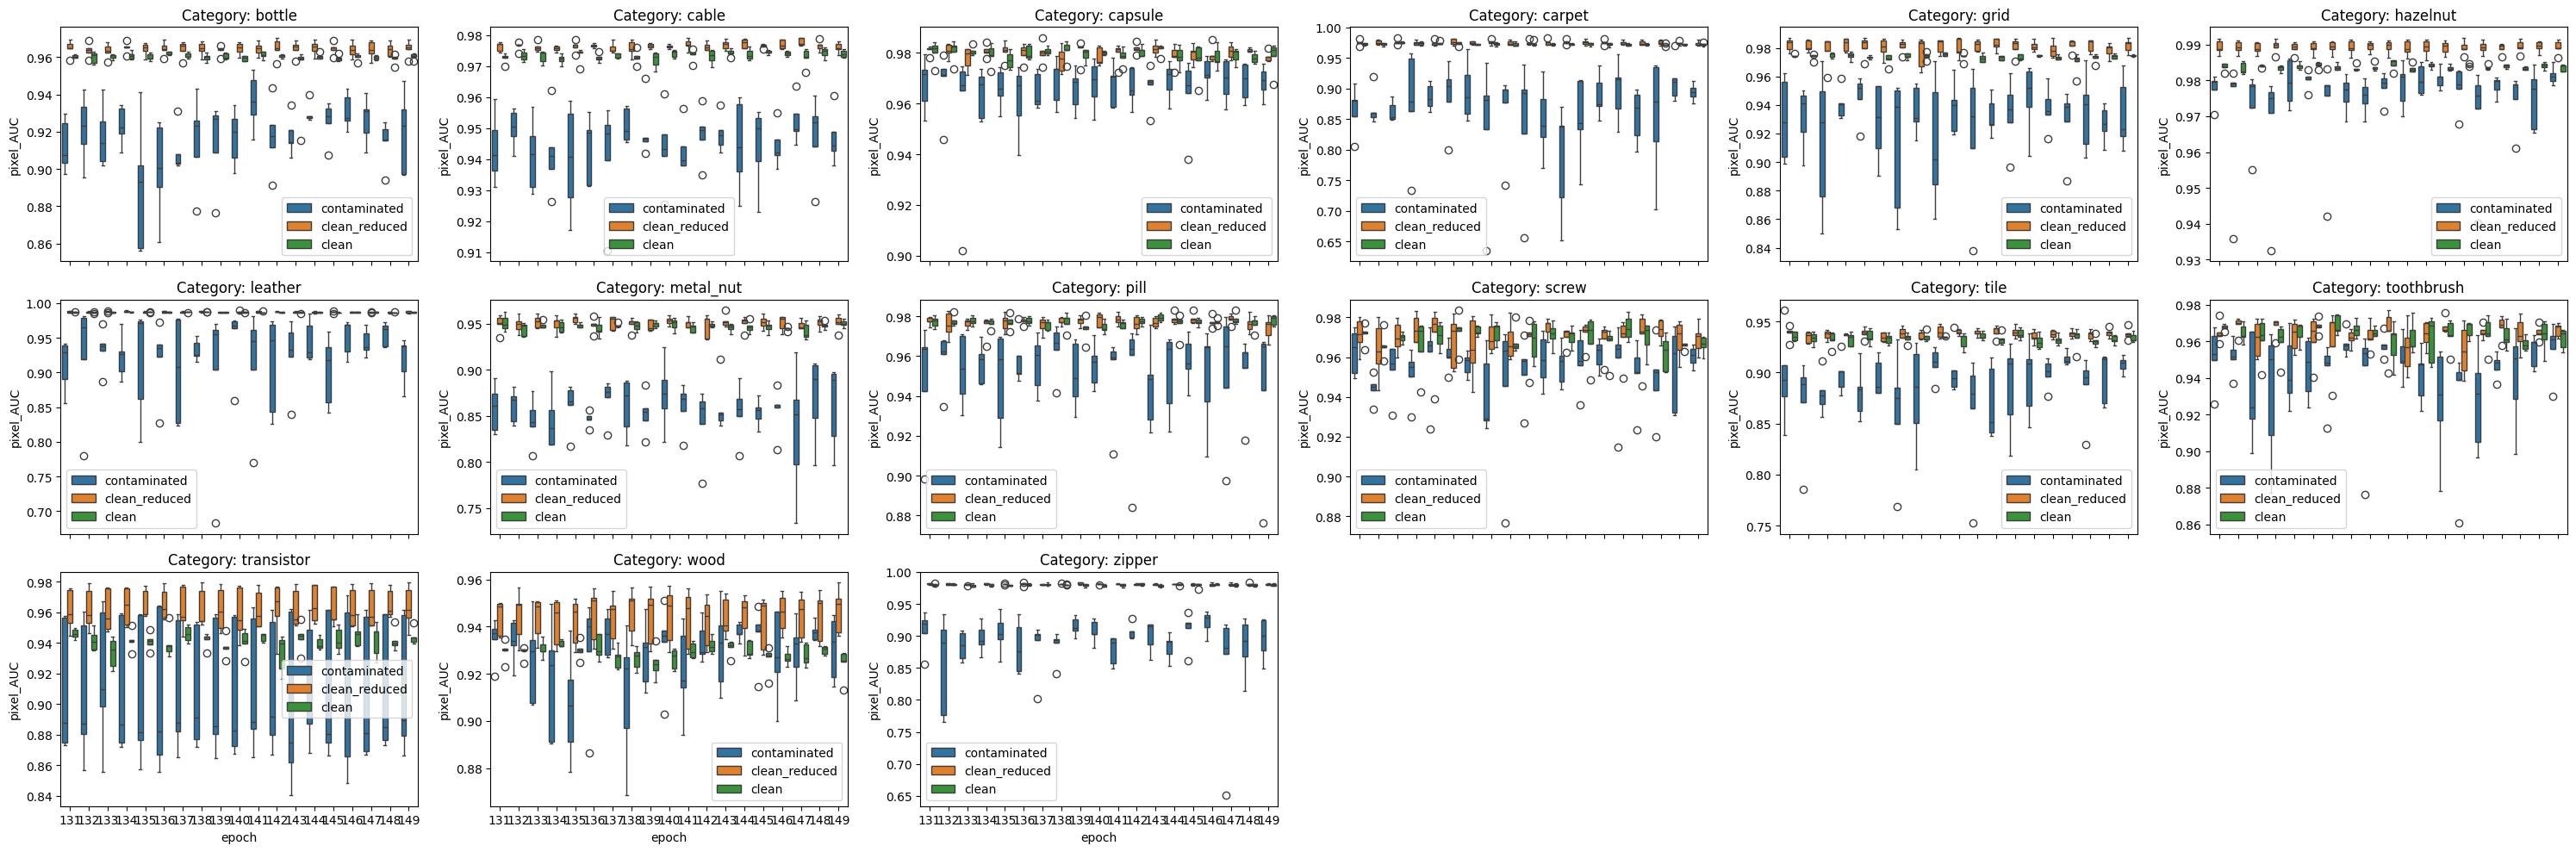

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'allres' is your DataFrame and is already loaded
# Example: allres = pd.read_csv('your_data.csv')

# Filter the DataFrame for epochs greater than 130
allres_epochs = allres[allres['epoch'] > 130]

# Get the unique categories
categories = allres['category'].unique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 6, figsize=(30, 10), sharex=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each category in a separate subplot
for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="pixel_AUC", hue="setting", data=allres_cat, ax=ax)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


# REMOVE unfinsihed trainingruns

In [20]:
directories=['/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_1-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_2-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_3-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_4-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_06_24_run_5-zipper']
directories=['/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_1-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_2-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_3-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_4-zipper','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-bottle','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-cable','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-capsule','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-carpet','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-grid','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-hazelnut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-leather','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-metal_nut','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-pill','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-screw','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-tile','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-toothbrush','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-transistor','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-wood','/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_07_06_run_5-zipper']


rerun=[]
for path in [path+'/args_cleaned.log' for path in directories]:
    if len(read_training_scores(path)['Loss'] )<150:
        rerun.append(path)
rerun


[]

In [21]:
len(set(directories))

75

In [22]:
# import os

# directories = []

# for directory in directories:
#     for root, dirs, files in os.walk(directory, topdown=False):
#         for name in files:
#             os.remove(os.path.join(root, name))
#         for name in dirs:
#             os.rmdir(os.path.join(root, name))
#     os.rmdir(directory)